# Data Science(JULIA)

# 5. Data Visualization with Makie.jl

> From the japanese word Maki-e, which is a technique to sprinkle lacquer with gold and silver powder. Data is the gold and silver of our age, so let’s spread it out beautifully on the screen!

> Simon Danisch, Creator of ```Makie.jl```

Makie.jl is a high-performance, extendable, and multi-platform plotting ecosystem for the Julia programming language. In our opinion, it is the prettiest and most versatile plotting package.

Like many plotting packages, the code is split into multiple packages. Makie.jl is the front end package that defines all plotting functions required to create plot objects. These objects store all information about the plots, but still need to be converted to an image. To convert these plot objects to an image, you need one of the Makie backends. By default, Makie.jl is reexported by every backend, so you only need to install and load the backend that you want to use.

There are three main backends which concretely implement all abstract rendering capabilities defined in Makie. These are

* **```CairoMakie.jl```** for non-interactive 2D publication-quality vector graphics,

* **```GLMakie.jl```** for interactive 2D and 3D plotting in standalone GLFW.jl windows (also GPU-powered), and

* **```WGLMakie.jl```**, a WebGL-based interactive 2D and 3D plotting that runs within browsers.

In this book we will only show examples for ```CairoMakie.jl``` and ```GLMakie.jl```.

You can activate any backend by using the appropriate package and calling its activate! function. For example:

In [1]:
using GLMakie

GLMakie.activate!()

Now, we will start with publication-quality plots. But, before going into plotting it is important to know how to save our plots. The easiest option to ```save``` a figure ```fig``` is to type ```save("filename.png", fig)```. Other formats are also available for **```CairoMakie.jl```** , such as ```svg``` and ```pdf```. The resolution of the output image can easily be adjusted by passing extra arguments. For example, for vector formats you specify ```pt_per_unit```:

```Julia
save("filename.pdf", fig; pt_per_unit=2)
```

or 

```Julia
save("filename.pdf", fig; pt_per_unit=0.5)
```


For png’s you specify px_per_unit. See Backends & Output for details.

Another important issue is to actually visualize your output plot. Note that for ```CairoMakie.jl``` the Julia REPL is not able to show plots, so you will need an IDE (Integrated Development Environment) such as VSCode, Jupyter or Pluto that supports png or svg as output. On the other hand, ```GLMakie.jl``` can open interactive windows, or alternatively display bitmaps inline if ```Makie.inline!(true)``` is called.

## 5.1 CairoMakie.jl

Let’s start with our first plot, some scatter points with lines between them:

In [2]:
using CairoMakie
CairoMakie.activate!()

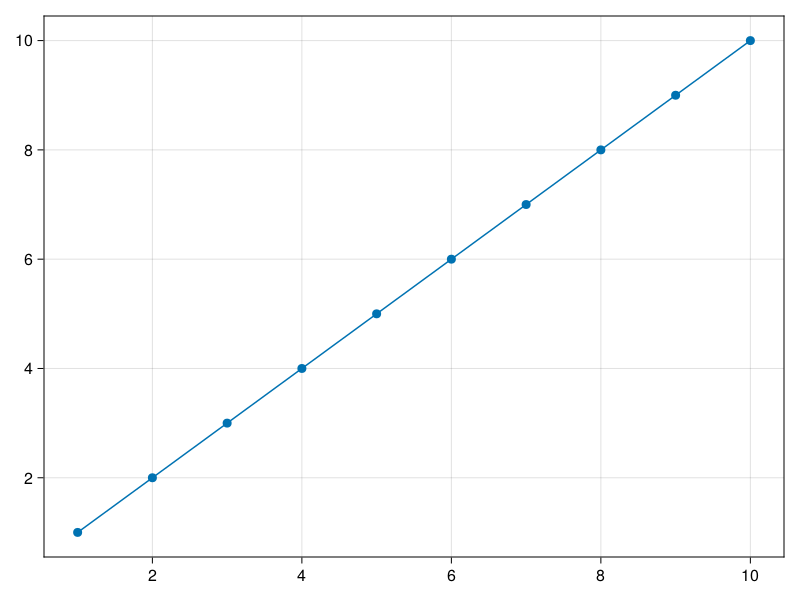

In [3]:
fig = scatterlines(1:10, 1:10)

Note that the previous plot is the default output, which we probably need to tweak by using axis names and labels.

Also note that every plotting function like ```scatterlines``` creates and returns a new ```Figure```, ```Axis``` and ```plot``` object in a collection called ```FigureAxisPlot```. These are known as the ```non-mutating``` methods. On the other hand, the ```mutating``` methods (e.g. ```scatterlines!```, note the ```!```) just return a plot object which can be appended into a given ```axis``` or the ```current_figure()```.

The next question that one might have is: how do I change the color or the marker type? This can be done via attributes, which we do in the next section.

In [4]:
save("5.1.CairoMakie_basic.png", fig; pt_per_unit=2)

## 5.2 Attributes

A custom plot can be created by using ```attributes```. The attributes can be set through keyword arguments. A list of ```attributes``` for every plotting object can be viewed via:

In [5]:
fig, ax, pltobj = scatterlines(1:10)
pltobj.attributes

Attributes with 15 entries:
  color => RGBA{Float32}(0.0,0.447059,0.698039,1.0)
  colormap => viridis
  colorrange => Automatic()
  cycle => [:color]
  inspectable => true
  linestyle => nothing
  linewidth => 1.5
  marker => Circle
  markercolor => Automatic()
  markercolormap => viridis
  markercolorrange => Automatic()
  markersize => 9
  model => Float32[1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  strokecolor => black
  strokewidth => 0

Or as a ```Dict``` calling ```pltobj.attributes.attributes```.

In [6]:
pltobj.attributes.attributes

Dict{Symbol, Observable} with 15 entries:
  :strokecolor      => Observable{Any} with 1 listeners. Value:…
  :colormap         => Observable{Any} with 1 listeners. Value:…
  :markersize       => Observable{Any} with 1 listeners. Value:…
  :linestyle        => Observable{Any} with 1 listeners. Value:…
  :markercolormap   => Observable{Any} with 1 listeners. Value:…
  :strokewidth      => Observable{Any} with 1 listeners. Value:…
  :cycle            => Observable{Any} with 0 listeners. Value:…
  :colorrange       => Observable{Any} with 1 listeners. Value:…
  :model            => Observable{Any} with 0 listeners. Value:…
  :marker           => Observable{Any} with 1 listeners. Value:…
  :color            => Observable{Any} with 2 listeners. Value:…
  :markercolorrange => Observable{Any} with 1 listeners. Value:…
  :markercolor      => Observable{Any} with 1 listeners. Value:…
  :linewidth        => Observable{Any} with 1 listeners. Value:…
  :inspectable      => Observable{Any} with 2 li

In [7]:
pltobj.attributes.attributes[:colormap]

Observable{Any} with 1 listeners. Value:
:viridis

Asking for help in the ```REPL``` as ```?lines``` or ```help(lines)``` for any given plotting function will show you their corresponding attributes plus a short description on how to use that specific function. For example, for ```lines```:

In [8]:
help(lines)

┌ Warning: argument help isn't currently implemented correctly
└ @ Makie C:\Users\jeffr\.julia\packages\Makie\Ppzqh\src\documentation\documentation.jl:63


```
lines(positions)
lines(x, y)
lines(x, y, z)
```

Creates a connected line plot for each element in `(x, y, z)`, `(x, y)` or `positions`.

`NaN` values are displayed as gaps in the line.

## Attributes

### Specific

  * `cycle::Vector{Symbol} = [:color]` sets which attributes to cycle when creating multiple plots.
  * `linestyle::Union{Nothing, Symbol, Vector} = nothing` sets the pattern of the line (e.g. `:solid`, `:dot`, `:dashdot`)
  * `linewidth::Real = 1.5` sets the width of the line in pixel units.

### Generic

  * `visible::Bool = true` sets whether the plot will be rendered or not.
  * `overdraw::Bool = false` sets whether the plot will draw over other plots. This specifically means ignoring depth checks in GL backends.
  * `transparency::Bool = false` adjusts how the plot deals with transparency. In GLMakie `transparency = true` results in using Order Independent Transparency.
  * `fxaa::Bool = false` adjusts whether the plot is rendered with fxaa (anti-aliasing). Note that line plots already use a different form of anti-aliasing.
  * `inspectable::Bool = true` sets whether this plot should be seen by `DataInspector`.
  * `depth_shift::Float32 = 0f0` adjusts the depth value of a plot after all other transformations, i.e. in clip space, where `0 <= depth <= 1`. This only applies to GLMakie and WGLMakie and can be used to adjust render order (like a tunable overdraw).
  * `model::Makie.Mat4f` sets a model matrix for the plot. This replaces adjustments made with `translate!`, `rotate!` and `scale!`.
  * `color` sets the color of the plot. It can be given as a named color `Symbol` or a `Colors.Colorant`. Transparency can be included either directly as an alpha value in the `Colorant` or as an additional float in a tuple `(color, alpha)`. The color can also be set for each point in the line by passing a `Vector` of colors or be used to index the `colormap` by passing a `Real` number or `Vector{<: Real}`.
  * `colormap::Union{Symbol, Vector{<:Colorant}} = :viridis` sets the colormap that is sampled for numeric `color`s.
  * `colorrange::Tuple{<:Real, <:Real}` sets the values representing the start and end points of `colormap`.
  * `nan_color::Union{Symbol, <:Colorant} = RGBAf(0,0,0,0)` sets a replacement color for `color = NaN`.
  * `space::Symbol = :data` sets the transformation space for line position. See `Makie.spaces()` for possible inputs.

`lines` has the following function signatures: 

```
  (Vector, Vector)
  (Vector, Vector, Vector)
  (Matrix)
```

Available attributes for `Lines` are: 

```
  color
  colormap
  colorrange
  cycle
  depth_shift
  diffuse
  inspectable
  linestyle
  linewidth
  nan_color
  overdraw
  shininess
  space
  specular
  ssao
  transparency
  visible
```


Not only the plot objects have attributes, also the ```Axis``` and ```Figure``` objects do. For example, for Figure, we have ```backgroundcolor```, ```resolution```, ```font``` and ```fontsize``` as well as the ```figure_padding``` which changes the amount of space around the figure content, see the grey area in Figure 5. It can take one number for all sides, or a tuple of four numbers for left, right, bottom and top.

```Axis``` has a lot more, some of them are ```backgroundcolor```, ```xgridcolor``` and ```title```. For a full list just type help(Axis).


Hence, for our next plot we will call several attributes at once as follows:

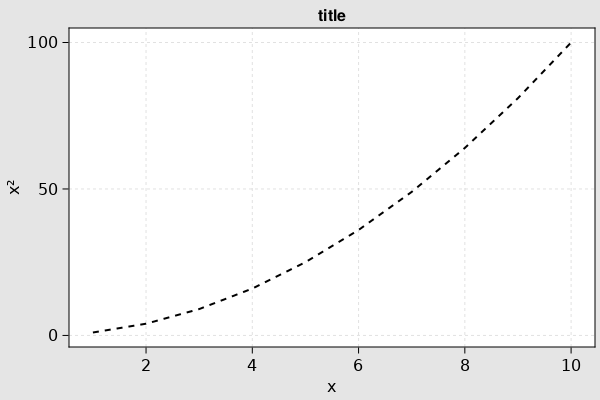

In [9]:
lines(1:10, (1:10).^2; 
        color=:black, 
        linewidth=2, 
        linestyle=:dash,
        figure=(; figure_padding=5, 
                    resolution=(600, 400), 
                    font="sans",
                    backgroundcolor=:grey90, 
                    fontsize=16),
        axis=(; xlabel="x", 
                ylabel="x²", 
                title="title",
                xgridstyle=:dash, 
                ygridstyle=:dash))
current_figure()

In [10]:
save("5.2.attributes-1.png", current_figure(); pt_per_unit=2)

This example has already most of the attributes that most users will normally use. Probably, a ```legend``` will also be good to have. Which for more than one function will make more sense. So, let’s ```append``` another mutation ```plot``` object and add the corresponding legends by calling ```axislegend```. This will collect all the ```labels``` you might have passed to your plotting functions and by default will be located in the right top position. For a different one, the ```position=:ct``` argument is called, where ```:ct``` means let’s put our label in the center and at the top, see Figure Figure 6:

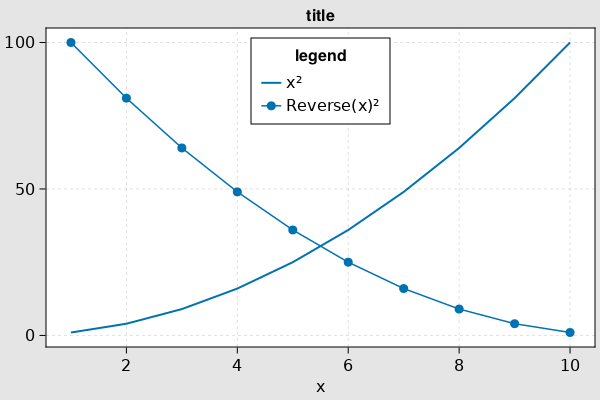

In [11]:
lines(1:10, (1:10).^2; 
        label="x²", 
        linewidth=2, 
        linestyle=nothing,
        figure=(; figure_padding=5, 
                    resolution=(600, 400), 
                    font="sans",
                    backgroundcolor=:grey90, 
                    fontsize=16),
        axis=(; xlabel="x", 
                title="title", 
                xgridstyle=:dash,
                ygridstyle=:dash))

scatterlines!(1:10, (10:-1:1).^2; label="Reverse(x)²")
axislegend("legend"; position=:ct)

current_figure()

In [12]:
save("5.2.attributes-2.png", current_figure(); pt_per_unit=2)

Other positions are also available by combining _left(l), center(c), right(r) and bottom(b), center(c), top(t)_. For instance, for left top, use ```:lt```.

However, having to write this much code just for two lines is cumbersome. So, if you plan on doing a lot of plots with the same general aesthetics, then setting a theme will be better. We can do this with ```set_theme!()``` as the following example illustrates.

Plotting the previous figure should take the new default settings defined by ```set_theme!(kwargs)```:

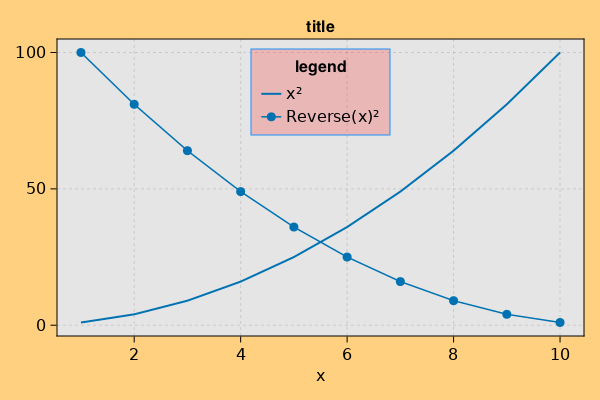

In [13]:
set_theme!(; resolution=(600, 400),
            backgroundcolor=(:orange, 0.5), fontsize=16, font="sans",
            Axis=(backgroundcolor=:grey90, xgridstyle=:dash, ygridstyle=:dash),
            Legend=(bgcolor=(:red, 0.2), framecolor=:dodgerblue))

lines(1:10, (1:10).^2; label="x²", linewidth=2, linestyle=nothing, 
        axis=(; xlabel="x", title="title"))

scatterlines!(1:10, (10:-1:1).^2; label="Reverse(x)²")

axislegend("legend"; position=:ct)

current_figure()

In [14]:
save("5.2.attributes-3.png", current_figure(); pt_per_unit=2)

In [15]:
set_theme!()

Note that the last line is ```set_theme!()```, which will reset to the default settings of Makie. For more on ```themes``` please go to Section 5.3.

Before moving on into the next section, it’s worthwhile to see an example where an ```array``` of attributes is passed at once to a plotting function. For this example, we will use the ```scatter``` plotting function to do a bubble plot.

The data for this could be an ```array``` with 100 rows and 3 columns, which we generated at random from a normal distribution. Here, the first column could be the positions in the ```x``` axis, the second one the positions in y and the third one an intrinsic associated value for each point. The latter could be represented in a plot by a different ```color``` or with a different marker size. In a bubble plot we can do both.

In [16]:
using Random: seed!
seed!(28)
xyvals = randn(100, 3)
xyvals[1:5, :]

5×3 Matrix{Float64}:
  0.550992   1.27614    -0.659886
 -1.06587   -0.0287242   0.175126
 -0.721591  -1.84423     0.121052
  0.801169   0.862781   -0.221599
 -0.340826   0.0589894  -1.76359

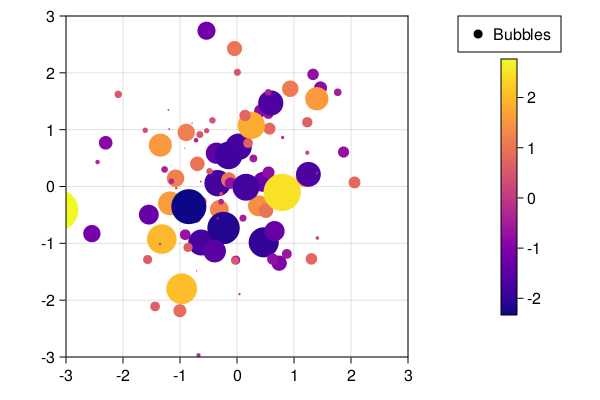

In [17]:
fig, ax, pltobj = scatter(xyvals[:, 1], xyvals[:, 2]; 
                            color = xyvals[:, 3],
                            label = "Bubbles", 
                            colormap = :plasma, 
                            markersize = 15 * abs.(xyvals[:, 3]),
                            figure=(; resolution=(600, 400)), 
                            axis=(; aspect=DataAspect()))

limits!(-3, 3, -3, 3)
Legend(fig[1, 2], ax, valign=:top)
Colorbar(fig[1, 2], pltobj, height=Relative(3 / 4))
fig

In [18]:
save("5.2.attributes-4.png", fig; pt_per_unit=2)

where we have decomposed the tuple ```FigureAxisPlot``` into ```fig, ax, pltobj```, in order to be able to add a ```Legend``` and ```Colorbar``` outside of the plotted object. We will discuss layout options in more detail in Section 5.6.

We have done some basic but still interesting examples to show how to use ```Makie.jl``` and by now you might be wondering: what else can we do? What are all the possible plotting functions available in ```Makie.jl```? To answer this question, a cheat sheet is shown in Figure 9. These work especially well with **```CairoMakie.jl```** backend.

![CairoMakie_cheat_sheet.png](Makie_cheat_sheet.png)

For completeness, in Figure 10, we show the corresponding functions cheat sheet for **```GLMakie.jl```** , which supports mostly 3D plots. Those will be explained in detail in Section 5.7.

![glmakie_cheat_sheet.png](Makie_cheat_sheet2.png)

Now, that we have an idea of all the things we can do, let’s go back and continue with the basics. It’s time to learn how to change the general appearance of our plots.

## 5.3 Themes

There are several ways to affect the general appearance of your plots. Either, you could use a predefined theme or your own custom theme. For example, use the predefined dark theme via ```with_theme(your_plot_function, theme_dark())```. Or, build your own with ```Theme(kwargs)``` or even update the one that is active with ```update_theme!(kwargs)```.

> **(pre-defined theme)** https://docs.makie.org/stable/documentation/theming/predefined_themes/index.html

You can also do ```set_theme!(theme; kwargs...)``` to change the current default theme to ```theme``` and override or add attributes given by ```kwargs```. If you do this and want to reset all previous settings just do ```set_theme!()``` with no arguments. See the following examples, where we had prepared a test plotting function with different characteristics, such that most attributes for each theme can be appreciated.

In [19]:
using Random: seed!
seed!(123)
y = cumsum(randn(6, 6), dims=2)

6×6 Matrix{Float64}:
  0.808288   0.386519   0.355371   0.0365011  -0.0911358   1.8115
 -1.12207   -2.47766   -2.16183   -2.49928    -2.02981    -1.37017
 -1.10464   -1.03518   -3.19756   -1.18944    -2.71633    -3.80455
 -0.416993  -0.534315  -1.42439   -0.659362   -0.0592298   0.644529
  0.287588   1.50687    2.36111    2.54137     0.48751     0.630836
  0.229819   0.522733   0.864515   2.89343     2.06537     2.21375

A matrix of size ```(20, 20)``` with random entries, so that we can plot a heatmap. The range in  and  is also specified.

In [20]:
using Random: seed!
seed!(13)
xv = yv = LinRange(-3, 0.5, 20)
matrix = randn(20, 20)
matrix[1:6, 1:6] # first 6 rows and columns

6×6 Matrix{Float64}:
 -0.271257   0.894952   0.728865  -0.293849   -0.449277   -0.0948871
 -0.193033  -0.421286  -0.455905  -0.0576092  -0.756621   -1.47419
 -0.123177   0.762254   0.773921  -0.38526    -0.0659695  -0.599284
 -1.47327    0.770122   1.20725    0.257913    0.111979    0.875439
 -1.82913   -0.603888   0.164083  -0.118504    1.46723     0.0948876
  1.09769    0.178207   0.110243  -0.543203    0.592245    0.328993

Hence, our plotting function looks like follows:

In [21]:
function demo_themes(y, xv, yv, matrix)
    fig, _ = series(y; labels=["$i" for i = 1:6], markersize=10,
        color=:Set1, figure=(; resolution=(600, 300)),
        axis=(; xlabel="time (s)", ylabel="Amplitude",
            title="Measurements"))
    hmap = heatmap!(xv, yv, matrix; colormap=:plasma)
    limits!(-3.1, 8.5, -6, 5.1)
    axislegend("legend"; merge=true)
    Colorbar(fig[1, 2], hmap)
    fig
end

demo_themes (generic function with 1 method)

Note that the ```series``` function has been used to plot several lines and scatters at once with their corresponding labels. And since we don’t need the axis neither the plotted object we throw them away with the syntax *_*. Also, a heatmap with their ```Colorbar``` has been included. Currently, there are two dark themes, one called ```theme_dark()``` and the other one ```theme_black()```, see Figures.

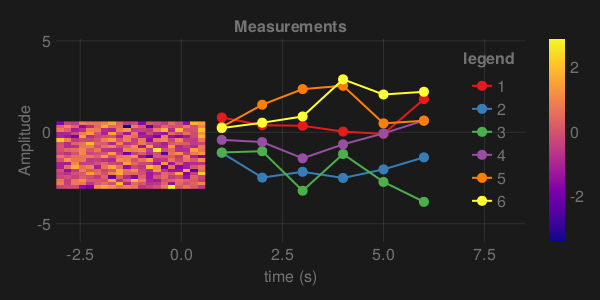

In [22]:
with_theme(theme_dark()) do
    demo_themes(y, xv, yv, matrix)
end

In [23]:
save("5.3.themes-1-dark.png", current_figure(); pt_per_unit=2)

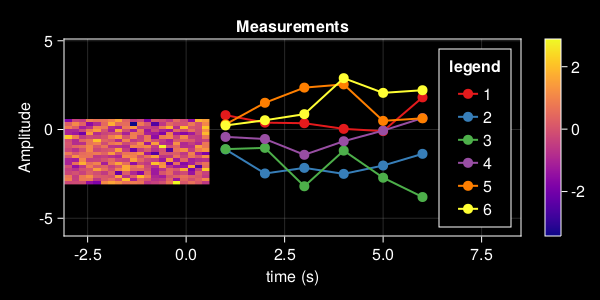

In [24]:
with_theme(theme_black()) do
    demo_themes(y, xv, yv, matrix)
end

In [25]:
save("5.3.themes-2-black.png", current_figure(); pt_per_unit=2)

And three more white-ish themes called, ```theme_ggplot2()```, ```theme_minimal()``` and ```theme_light()```. Useful for more standard publication type plots.

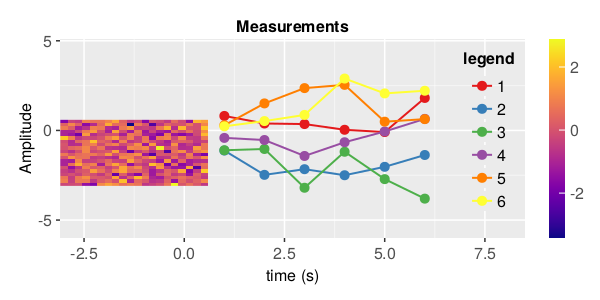

In [26]:
with_theme(theme_ggplot2()) do
    demo_themes(y, xv, yv, matrix)
end

In [27]:
save("5.3.themes-3-ggplot.png", current_figure(); pt_per_unit=2)

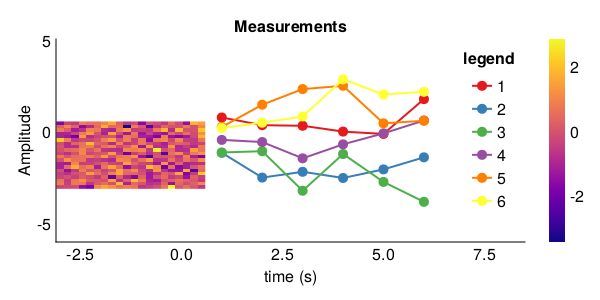

In [28]:
with_theme(theme_minimal()) do
    demo_themes(y, xv, yv, matrix)
end

In [29]:
save("5.3.themes-4-minimal.png", current_figure(); pt_per_unit=2)

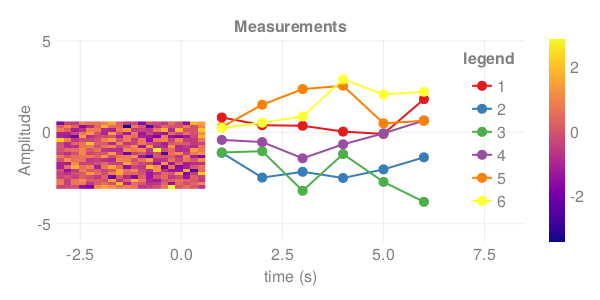

In [30]:
with_theme(theme_light()) do
    demo_themes(y, xv, yv, matrix)
end

In [31]:
save("5.3.themes-5-light.png", current_figure(); pt_per_unit=2)

Another alternative is defining a **custom ```Theme```** by doing ```with_theme(your_plot, your_theme())```. For instance, the following theme could be a simple version for a publication quality template:

In [32]:
publication_theme() = Theme(
    fontsize=16, font="CMU Serif",
    Axis=(xlabelsize=20, 
            xgridstyle=:dash, 
            ygridstyle=:dash,
            xtickalign=1, 
            ytickalign=1, 
            yticksize=10, 
            xticksize=10,
            xlabelpadding=-5, 
            xlabel="x", ylabel="y"),
    Legend=(framecolor=(:black, 0.5), bgcolor=(:white, 0.5)),
    Colorbar=(ticksize=16, tickalign=1, spinewidth=0.5),
)

publication_theme (generic function with 1 method)

Which, for simplicity we use it to plot ```scatterlines``` and a ```heatmap```.

In [33]:
function plot_with_legend_and_colorbar()
    fig, ax, _ = scatterlines(1:10; label="line")
    hm = heatmap!(ax, LinRange(6, 9, 15), LinRange(2, 5, 15), randn(15, 15);
        colormap=:Spectral_11)
    axislegend("legend"; position=:lt)
    Colorbar(fig[1, 2], hm, label="values")
    colsize!(fig.layout, 1, Aspect(1, 1.0))
    ax.title = "my custom theme"
    fig
end

plot_with_legend_and_colorbar (generic function with 1 method)

Then, using the previously define Theme the output is shown in Figure (Figure 16).

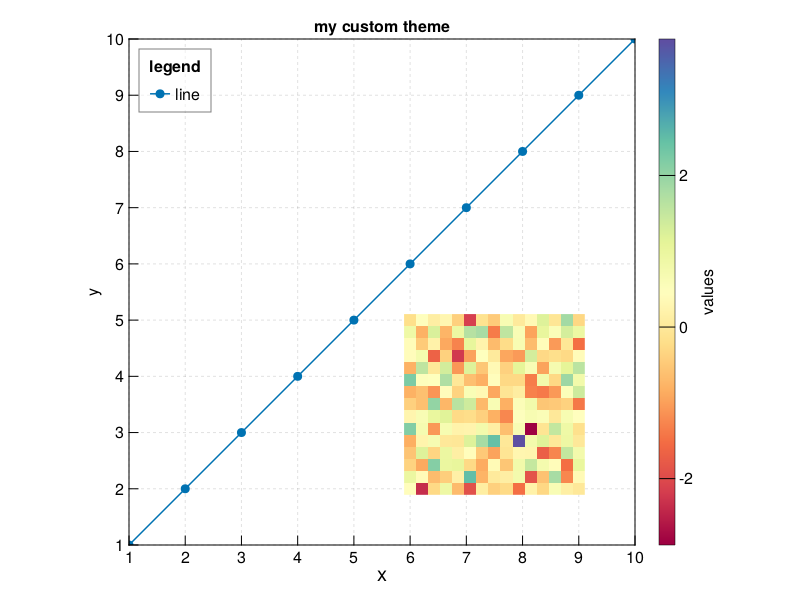

In [34]:
with_theme(plot_with_legend_and_colorbar, publication_theme())

In [35]:
save("5.3.themes-6-custom.png", current_figure(); pt_per_unit=2)

Here we have use ```with_theme``` which is more convenient for the direct application of a theme than the ```do``` syntax. You should use the latter if you want to include extra arguments to the theme that is going to be applied.

Now, if something needs to be changed after ```set_theme!(your_theme)```, we can do it with ```update_theme!(resolution=(500, 400), fontsize=18)```, for example. Another approach will be to pass additional arguments to the ```with_theme``` function:

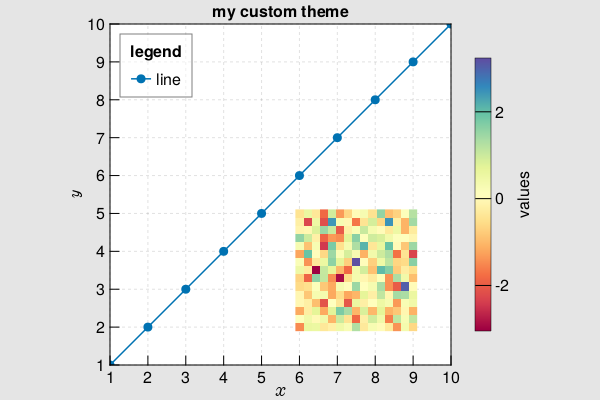

In [36]:
fig = (resolution=(600, 400), figure_padding=1, backgroundcolor=:grey90)

ax = (; aspect=DataAspect(), xlabel=L"x", ylabel=L"y")

cbar = (; height=Relative(4 / 5))

# Figure 17: Theme with extra args.
with_theme(publication_theme(); fig..., Axis=ax, Colorbar=cbar) do
    plot_with_legend_and_colorbar()
end

In [37]:
save("5.3.themes-6-custom2.png", current_figure(); pt_per_unit=2)

Where the x and y labels have a Latex format due to ```L"..."```. Most basic Latex strings are already supported by Makie, however to fully exploit this integration is recommend to also load the package **LaTeXStrings** as stated in the next section.

## 5.4 Using LaTeXStrings.jl

LaTeX support in ```Makie.jl``` is also available via ```LaTeXStrings.jl```:

In [38]:
using LaTeXStrings

Simple use cases are shown below (Figure 18). A basic example includes LaTeX strings for x-y labels and legends:

In [39]:
function LaTeX_Strings()
    x = 0:0.05:4π
    lines(x, x -> sin(3x) / (cos(x) + 2) / x; 
            label=L"\frac{\sin(3x)}{x(\cos(x)+2)}",
            figure=(; resolution=(600, 400)), axis=(; xlabel=L"x"))
    lines!(x, x -> cos(x) / x; label=L"\cos(x)/x")
    lines!(x, x -> exp(-x); label=L"e^{-x}")
    limits!(-0.5, 13, -0.6, 1.05)
    axislegend(L"f(x)")
    current_figure()
end

LaTeX_Strings (generic function with 1 method)

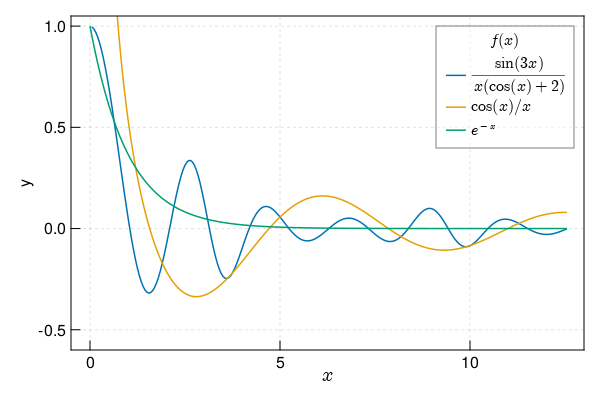

In [40]:
with_theme(LaTeX_Strings, publication_theme())

In [41]:
save("5.4.LaTeXStrings1.png", current_figure(); pt_per_unit=2)

A more involved example will be one with some equation as ```text``` and increasing legend numbering for curves in a plot:

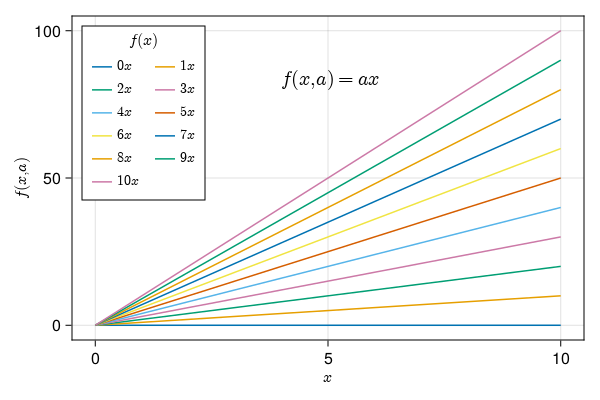

In [42]:
function multiple_lines()
    x = collect(0:10)
    fig = Figure(resolution=(600, 400), font="CMU Serif")
    ax = Axis(fig[1, 1], xlabel=L"x", ylabel=L"f(x,a)")
    for i = 0:10
        lines!(ax, x, i .* x; label=latexstring("$(i) x"))
    end
    axislegend(L"f(x)"; position=:lt, nbanks=2, labelsize=14)
    text!(L"f(x,a) = ax", position=(4, 80))
    fig
end
multiple_lines()

In [43]:
save("5.4.LaTeXStrings2.png", current_figure(); pt_per_unit=2)

Changing the theme using with_theme function to theme_light

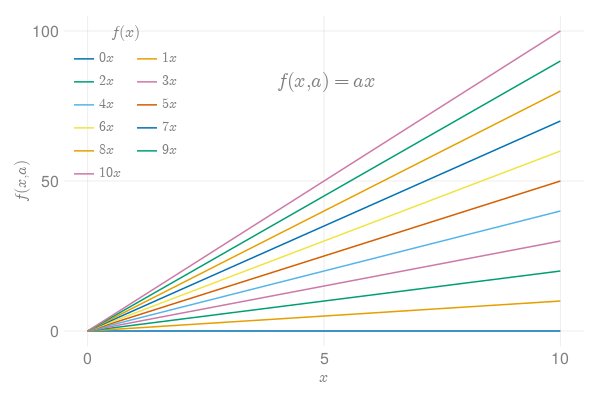

In [44]:
with_theme(theme_light()) do
    multiple_lines()
end

In [45]:
save("5.4.LaTeXStrings3.png", current_figure(); pt_per_unit=2)

Where ```latexstring``` from ```LaTeXStrings.jl``` has been used to parse the string. An alternative to this simple case is ```L"%$i x"```, which is used in the next example.

But, before that there is another problem, some lines have repeated colors and that’s no good. Adding some markers and line styles usually helps. So, let’s do that using **Cycles** for these types. Setting ```covary=true``` allows to cycle all elements together:

> **(Cycles)** https://docs.makie.org/stable/documentation/theming/index.html#cycles (색상 파레트 제공 기능 -> cycling이라 부름)

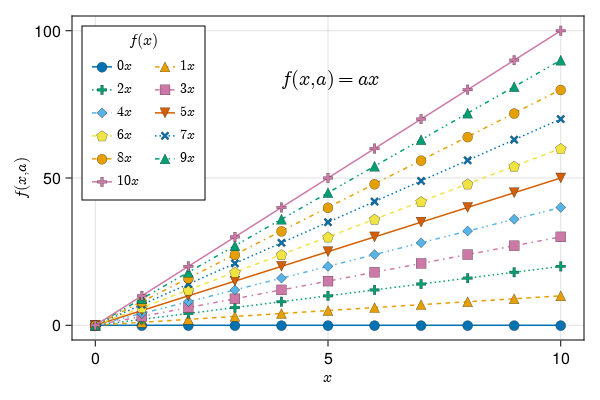

In [46]:
function multiple_scatters_and_lines()
    x = collect(0:10)
    
    # 각각의 색상을 cycle 기능을 통해 설정
    cycle = Cycle([:color, :linestyle, :marker], covary=true) 
    set_theme!(Lines=(cycle=cycle,), Scatter=(cycle=cycle,))
    fig = Figure(resolution=(600, 400), font="CMU Serif")
    ax = Axis(fig[1, 1], xlabel=L"x", ylabel=L"f(x,a)")
    for i in x
        lines!(ax, x, i .* x; label=L"%$i x")
        scatter!(ax, x, i .* x; markersize=13, strokewidth=0.25,
            label=L"%$i x")
    end
    axislegend(L"f(x)"; merge=true, position=:lt, nbanks=2, labelsize=14)
    text!(L"f(x,a) = ax", position=(4, 80))
    set_theme!() # reset to default theme
    fig
end
multiple_scatters_and_lines()

In [47]:
save("5.4.LaTeXStrings4.png", current_figure(); pt_per_unit=2)

And voilà. A publication quality plot is here. What more can we ask for? Well, what about different default colors or palettes. In our next section, we will see how to use again Cycles and know a little bit more about them, plus some additional keywords in order to achieve this.

## 5.5 Colors and Colormaps

Choosing an appropriate set of colors or colorbar for your plot is an essential part when presenting results. Using **Colors.jl** is supported in ```Makie.jl``` so that you can use **named colors or pass ```RGB``` or ```RGBA``` values**. Additionally, colormaps from **ColorSchemes.jl** and **PerceptualColourMaps.jl** can also be used. It is worth knowing that you can reverse a colormap by doing ```Reverse(:colormap_name)``` and obtain a transparent color or colormap with ```color=(:red,0.5)``` and ```colormap=(:viridis, 0.5)```.

Different use cases will be shown next. Then we will define a custom theme with new colors and a colorbar palette.

By default **```Makie.jl```** has a predefined set of colors in order to cycle through them automatically, as shown in the previous figures, where no specific color was set. Overwriting these defaults is done by calling the keyword ```color``` in the plotting function and specifying a new color via a ```Symbol``` or ```String```. See this in action in the following example:

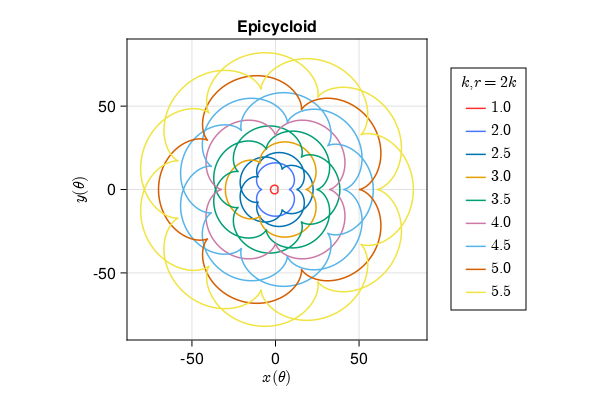

In [48]:
function set_colors_and_cycle()
    # Epicycloid lines
    x(r, k, θ) = r * (k .+ 1.0) .* cos.(θ) .- r * cos.((k .+ 1.0) .* θ)
    y(r, k, θ) = r * (k .+ 1.0) .* sin.(θ) .- r * sin.((k .+ 1.0) .* θ)
    θ = LinRange(0, 6.2π, 1000)
    axis = (; xlabel=L"x(\theta)", ylabel=L"y(\theta)",
        title="Epicycloid", aspect=DataAspect())
    figure = (; resolution=(600, 400), font="CMU Serif")
    fig, ax, _ = lines(x(1, 1, θ), y(1, 1, θ); color="firebrick1", # string
        label=L"1.0", axis=axis, figure=figure)
    lines!(ax, x(4, 2, θ), y(4, 2, θ); color=:royalblue1, #symbol
        label=L"2.0")
    for k = 2.5:0.5:5.5
        lines!(ax, x(2k, k, θ), y(2k, k, θ); label=latexstring("$(k)")) #cycle
    end
    Legend(fig[1, 2], ax, latexstring("k, r = 2k"), merge=true)
    colsize!(fig.layout, 1, Aspect(1, 1.0))
    fig
end
set_colors_and_cycle()

In [49]:
save("5.5.colors_colormap1.png", current_figure(); pt_per_unit=2)

Where, in the first two lines we have used the keyword ```color``` to specify our color. The rest is using the default cycle set of colors. Later, we will learn how to do a custom cycle.

Regarding colormaps, we are already familiar with the keyword ```colormap``` for heatmaps and scatters. Here, we show that a colormap can also be specified via a ```Symbol``` or a ```String```, similar to colors. Or, even a vector of **RGB colors**. Let’s do our first example by calling colormaps as a ```Symbol```, ```String``` and ```cgrad``` for categorical values. See ```?cgrad``` for more information.

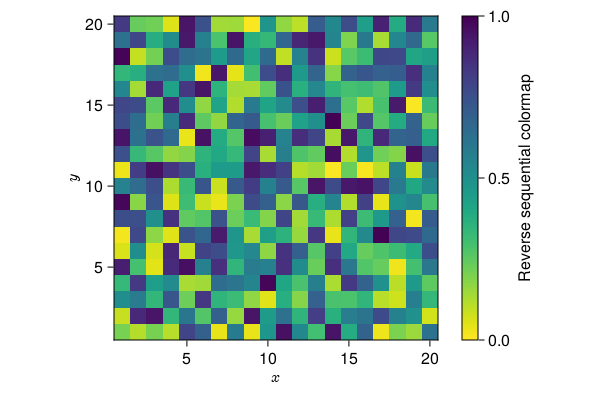

In [50]:
figure = (; resolution=(600, 400), font="CMU Serif")
axis = (; xlabel=L"x", ylabel=L"y", aspect=DataAspect())
fig, ax, pltobj = heatmap(rand(20, 20); colorrange=(0, 1),
    colormap=Reverse(:viridis), axis=axis, figure=figure)
Colorbar(fig[1, 2], pltobj, label = "Reverse sequential colormap")
colsize!(fig.layout, 1, Aspect(1, 1.0))
fig

In [51]:
save("5.5.colors_colormap2.png", fig; pt_per_unit=2)

In [52]:
?cgrad

search: cgrad categorical_colors



```
cgrad(colors, [values]; categorical = nothing, scale = nothing, rev = false, alpha = nothing)
```

Construct a Colorgradient from `colors` and `values`.

`colors` can be a symbol for ColorSchemes.jl `ColorScheme`s, a `ColorScheme`, a vector of colors, a `ColorGradient` or a `ColorPalette`. If `values` is an integer, it specifies the numbers of colors chosen equidistantly from the colorscheme specified by colors. Otherwise vectors are accepted. For continuous color gradients `values` indicate where between 0 and 1 the colors are positioned. For categorical color gradients `values` indicate where a color ends and where a new one begins between 0 and 1. 0 and 1 are added to `values` if not already present.

If `rev` is `true` colors are reversed. `scale` accepts the symbols `:log`, `:log10`, `:log2`, `:ln`, `:exp`, `:exp10` or functions. If `alpha` is set, it is applied to all colors.


When setting a **```colorrange```** usually the values outside this range are colored with the first and last color from the colormap. However, sometimes is better to specify the color you want at both ends. We do that with highclip and lowclip:

In [53]:
using ColorSchemes

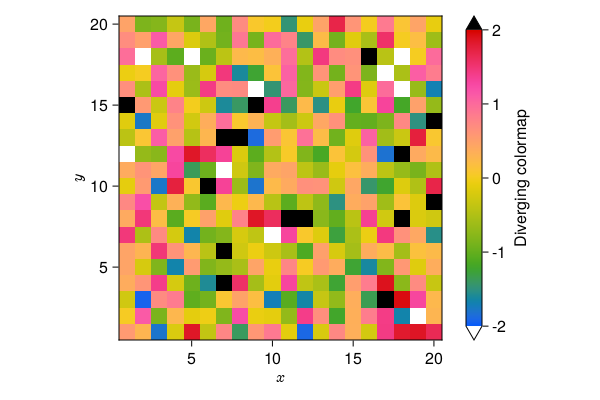

In [54]:
figure = (; resolution = (600, 400), font = "CMU Serif")
axis = (; xlabel = L"x", ylabel = L"y", aspect = DataAspect())
fig, ax, pltobj = heatmap(randn(20, 20); colorrange = (-2, 2),
    colormap = "diverging_rainbow_bgymr_45_85_c67_n256",
    highclip = :black, lowclip = :white, axis = axis, figure = figure)
Colorbar(fig[1, 2], pltobj, label = "Diverging colormap")
colsize!(fig.layout, 1, Aspect(1, 1.0))
fig

In [55]:
save("5.5.colors_colormap3.png.png", fig; pt_per_unit=2)

But we mentioned that also ```RGB``` vectors are valid options. For our next example you could pass the custom colormap _perse_ or use ```cgrad``` to force a categorical ```Colorbar```.

In [56]:
using Colors, ColorSchemes

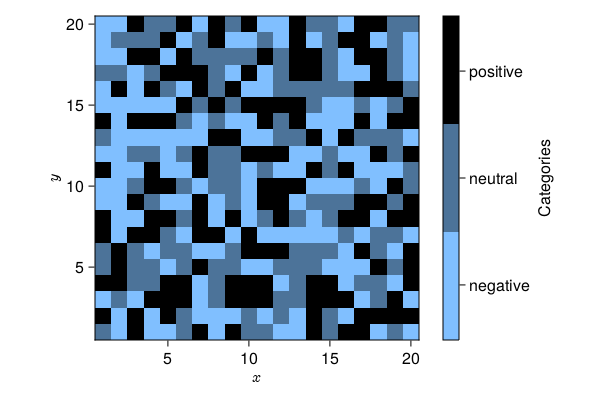

In [57]:
figure = (; resolution = (600, 400), font = "CMU Serif")
axis = (; xlabel = L"x", ylabel = L"y", aspect = DataAspect())
#cmap = ColorScheme(range(colorant"red", colorant"green", length=3))
# this is another way to obtain a colormap, not used here, but try it.
mycmap = ColorScheme([RGB{Float64}(i, 1.5i, 2i) for i in [0.0, 0.25, 0.35, 0.5]])
fig, ax, pltobj = heatmap(rand(-1:1, 20, 20);
                            colormap = cgrad(mycmap, 3, 
                                            categorical = true, 
                                            rev = true), # cgrad and Symbol, mycmap
                            axis = axis, 
                            figure = figure)

cbar = Colorbar(fig[1, 2], pltobj, label = "Categories")
cbar.ticks = ([-0.66, 0, 0.66], ["negative", "neutral", "positive"])
colsize!(fig.layout, 1, Aspect(1, 1.0))
fig

In [58]:
save("5.5.colors_colormap4.png.png", fig; pt_per_unit=2)

Lastly, the ticks in the colorbar for the categorial case are not centered by default in each color. This is fixed by passing custom ticks, as in ```cbar.ticks = (positions, ticks)```.

The last situation is when passing a multiple colors to ```colormap```. You will get an interpolated colormap between these two colors. Also, hexadecimal coded colors are accepted. So, on top or our heatmap let’s put one semi-transparent point using this.

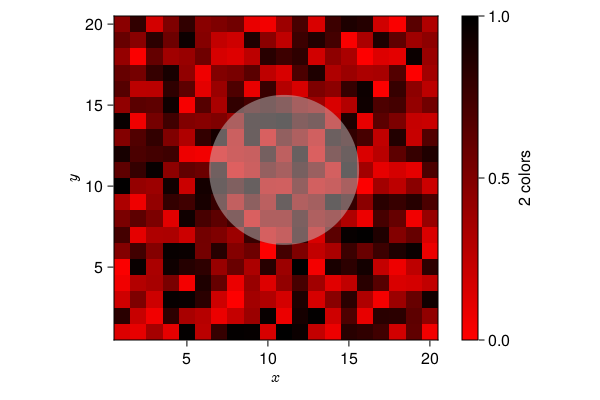

In [59]:
figure = (; resolution = (600, 400), font = "CMU Serif")
axis = (; xlabel = L"x", ylabel = L"y", aspect = DataAspect())
fig, ax, pltobj = heatmap(rand(20, 20); 
                        colorrange = (0, 1),
                        colormap = ["red", "black"], 
                        axis = axis, 
                        figure = figure)
scatter!(ax, [11], [11], color = ("#C0C0C0", 0.5), markersize = 150)
Colorbar(fig[1, 2], pltobj, label = "2 colors")
colsize!(fig.layout, 1, Aspect(1, 1.0))
fig

In [60]:
save("5.5.colors_colormap5.png", fig; pt_per_unit=2)

### 5.5.1 Custom cycle

Here, we could define a global ```Theme``` with a new cycle for colors, however that is **not the recommend way** to do it. It’s better to define a new theme and use as shown before. Let’s define a new one with a ```cycle``` for ```:color```, ```:linestyle```, ```:marker``` and a new ```colormap``` default. And add these new attributes to our previous ```publication_theme```.

In [61]:
function new_cycle_theme()
    # https://nanx.me/ggsci/reference/pal_locuszoom.html
    my_colors = ["#D43F3AFF", "#EEA236FF", "#5CB85CFF", "#46B8DAFF",
        "#357EBDFF", "#9632B8FF", "#B8B8B8FF"]
    cycle = Cycle([:color, :linestyle, :marker], covary=true) # alltogether
    my_markers = [:circle, :rect, :utriangle, :dtriangle, :diamond,
        :pentagon, :cross, :xcross]
    my_linestyle = [nothing, :dash, :dot, :dashdot, :dashdotdot]
    Theme(
        fontsize=16, font="CMU Serif",
        colormap=:linear_bmy_10_95_c78_n256,
        palette=(color=my_colors, marker=my_markers, linestyle=my_linestyle),
        Lines=(cycle=cycle,), Scatter=(cycle=cycle,),
        Axis=(xlabelsize=20, xgridstyle=:dash, ygridstyle=:dash,
            xtickalign=1, ytickalign=1, yticksize=10, xticksize=10,
            xlabelpadding=-5, xlabel="x", ylabel="y"),
        Legend=(framecolor=(:black, 0.5), bgcolor=(:white, 0.5)),
        Colorbar=(ticksize=16, tickalign=1, spinewidth=0.5),
    )
end

new_cycle_theme (generic function with 1 method)

And apply it to a plotting function like the following:

In [62]:
function scatters_and_lines()
    x = collect(0:10)
    xh = LinRange(4, 6, 25)
    yh = LinRange(70, 95, 25)
    h = randn(25, 25)
    fig = Figure(resolution=(600, 400), font="CMU Serif")
    ax = Axis(fig[1, 1], xlabel=L"x", ylabel=L"f(x,a)")
    for i in x
        lines!(ax, x, i .* x; label=latexstring("$(i) x"))
        scatter!(ax, x, i .* x; markersize=13, strokewidth=0.25,
            label=latexstring("$(i) x"))
    end
    hm = heatmap!(xh, yh, h)
    axislegend(L"f(x)"; merge=true, position=:lt, nbanks=2, labelsize=14)
    Colorbar(fig[1, 2], hm, label="new default colormap")
    limits!(ax, -0.5, 10.5, -5, 105)
    colgap!(fig.layout, 5)
    fig
end

scatters_and_lines (generic function with 1 method)

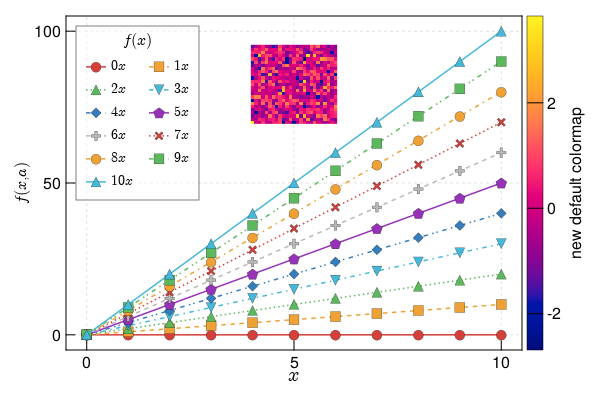

In [63]:
with_theme(scatters_and_lines, new_cycle_theme())

In [64]:
save("5.5.colors_colormap6_custom.png", fig; pt_per_unit=2)

At this point you should be able to have **complete control** over your colors, line styles, markers and colormaps for your plots. Next, we will dive into how to manage and control **layouts.**

## 5.6 Layouts

A complete canvas/layout is defined by ```Figure```, which can be filled with content after creation. We will start with a simple arrangement of one ```Axis```, one ```Legend``` and one ```Colorbar```. For this task we can think of the canvas as an arrangement of ```rows``` and ```columns``` in indexing a ```Figure``` much like a regular ```Array/Matrix```. The Axis content will be in row 1, column 1, e.g. ```fig[1, 1]```, the ```Colorbar``` in row 1, column 2, namely ```fig[1, 2]```. And the ```Legend``` in row 2 and across column 1 and 2, namely ```fig[2, 1:2]```.

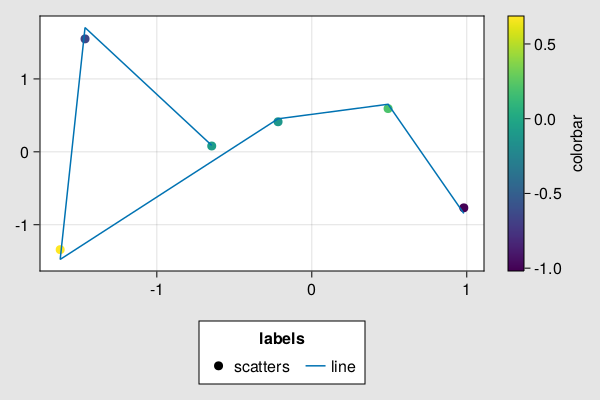

In [65]:
function first_layout()
    seed!(123)
    x, y, z = randn(6), randn(6), randn(6)
    fig = Figure(resolution=(600, 400), backgroundcolor=:grey90)
    ax = Axis(fig[1, 1], backgroundcolor=:white)
    pltobj = scatter!(ax, x, y; color=z, label="scatters")
    lines!(ax, x, 1.1y; label="line")
    Legend(fig[2, 1:2], ax, "labels", orientation=:horizontal)
    Colorbar(fig[1, 2], pltobj, label="colorbar")
    fig
end
first_layout()

In [66]:
save("5.6.Layouts1.png", current_figure(); pt_per_unit=2)

This does look good already, but it could be better. We could fix spacing problems using the following keywords and methods:

* ```figure_padding=(left, right, bottom, top)```
* ```padding=(left, right, bottom, top)```

Taking into account the actual size for a Legend or Colorbar is done by
> * ```tellheight=true``` or ```false```
> * ```tellwidth=true``` or ```false```

> Setting these to ```true``` will take into account the actual size (height or width) for a ```Legend``` or ```Colorbar```. Consequently, things will be resized accordingly.

The space between columns and rows is specified as

> * ```colgap!(fig.layout, col, separation)```
> * ```rowgap!(fig.layout, row, separation)```

> Column gap (```colgap!```), if ```col``` is given then the gap will be applied to that specific column. Row gap (```rowgap!```), if ```row``` is given then the gap will be applied to that specific row.

Also, we will see how to put content into the **protrusions**, i.e. the space reserved for title: ```x``` and ```y```; either ```ticks``` or ```label```. We do this by plotting into ```fig[i, j, protrusion]``` where ```protrusion``` can be ```Left()```, ```Right()```, ```Bottom()``` and ```Top()```, or for each corner ```TopLeft()```, ```TopRight()```, ```BottomRight()```, ```BottomLeft()```. See below how these options are being used:

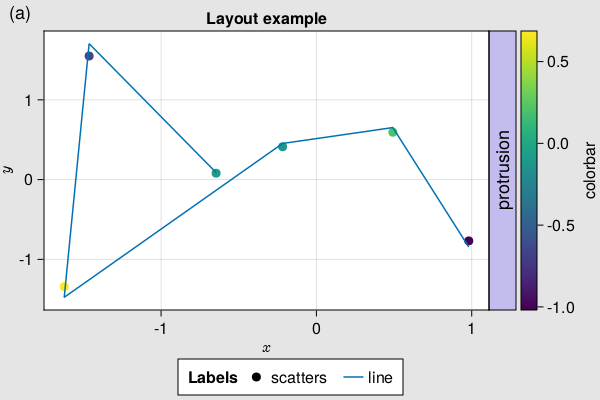

In [67]:
function first_layout_fixed()
    seed!(123)
    x, y, z = randn(6), randn(6), randn(6)
    fig = Figure(figure_padding=(0, 3, 5, 2), resolution=(600, 400),
        backgroundcolor=:grey90, font="CMU Serif")
    ax = Axis(fig[1, 1], xlabel=L"x", ylabel=L"y",
        title="Layout example", backgroundcolor=:white)
    pltobj = scatter!(ax, x, y; color=z, label="scatters")
    lines!(ax, x, 1.1y, label="line")
    Legend(fig[2, 1:2], ax, "Labels", orientation=:horizontal,
        tellheight=true, titleposition=:left)
    Colorbar(fig[1, 2], pltobj, label="colorbar")
    # additional aesthetics
    Box(fig[1, 1, Right()], color=(:slateblue1, 0.35))
    Label(fig[1, 1, Right()], "protrusion", textsize=18,
        rotation=pi / 2, padding=(3, 3, 3, 3))
    Label(fig[1, 1, TopLeft()], "(a)", textsize=18, padding=(0, 3, 8, 0))
    colgap!(fig.layout, 5)
    rowgap!(fig.layout, 5)
    fig
end
first_layout_fixed()

In [68]:
save("5.6.Layouts2.png", current_figure(); pt_per_unit=2)

Here, having the label ```(a)``` in the ```TopLeft()``` is probably not necessary, this will only make sense for more than one plot. For our next example let’s keep using the previous tools and some more to create a richer and complex figure.

You can hide decorations and axis’ spines with:

> * ```hidedecorations!(ax; kwargs...)```
> * ```hidexdecorations!(ax; kwargs...)```
> * ```hideydecorations!(ax; kwargs...)```
> * ```hidespines!(ax; kwargs...)```

Remember, we can always ask for help to see what kind of arguments we can use, e.g.,

In [69]:
help(hidespines!)

┌ Warning: argument help isn't currently implemented correctly
└ @ Makie C:\Users\jeffr\.julia\packages\Makie\Ppzqh\src\documentation\documentation.jl:63


```
hidespines!(la::Axis, spines::Symbol... = (:l, :r, :b, :t)...)
```

Hide all specified axis spines. Hides all spines by default, otherwise choose with the symbols :l, :r, :b and :t.

`hidespines!` has the following function signatures: 

```
  (Vector, Vector)
  (Vector, Vector, Vector)
  (Matrix)
```

Available attributes for `Combined{Makie.hidespines!}` are: 

```

```


Alternatively, for decorations

In [70]:
help(hidedecorations!)

┌ Warning: argument help isn't currently implemented correctly
└ @ Makie C:\Users\jeffr\.julia\packages\Makie\Ppzqh\src\documentation\documentation.jl:63


```
hidedecorations!(la::Axis)
```

Hide decorations of both x and y-axis: label, ticklabels, ticks and grid.

`hidedecorations!` has the following function signatures: 

```
  (Vector, Vector)
  (Vector, Vector, Vector)
  (Matrix)
```

Available attributes for `Combined{Makie.hidedecorations!}` are: 

```

```


For elements that **you don’t want to hide**, just pass them with ```false```, i.e. ```hideydecorations!(ax; ticks=false, grid=false)```

Synchronizing your Axis is done via:

> * ```linkaxes!```, ```linkyaxes!``` and ```linkxaxes!```

> This could be useful when shared axis are desired. Another way of getting shared axis will be by setting ```limits!```.

Setting ```limits``` at once or independently for each axis is done by calling

> * ```limits!(ax; l, r, b, t)```, where ```l``` is left, ```r``` right, ```b``` bottom, and ```t``` top.

> You can also do ```ylims!(low, high)``` or ```xlims!(low, high)```, and even open ones by doing ```ylims!(low=0)``` or ```xlims!(high=1)```.

Now, the example:

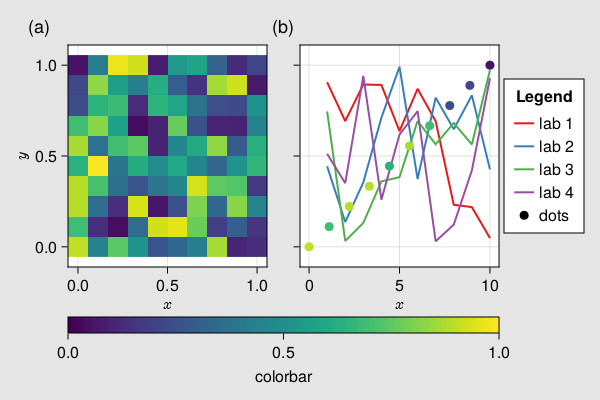

In [71]:
function complex_layout_double_axis()
    seed!(123)
    x = LinRange(0, 1, 10)
    y = LinRange(0, 1, 10)
    z = rand(10, 10)
    fig = Figure(resolution = (600, 400), font = "CMU Serif", backgroundcolor = :grey90)
    ax1 = Axis(fig, xlabel = L"x", ylabel = L"y")
    ax2 = Axis(fig, xlabel = L"x")
    heatmap!(ax1, x, y, z; colorrange=(0, 1))
    series!(ax2, abs.(z[1:4, :]); labels=["lab $i" for i = 1:4], color=:Set1_4)
    hm = scatter!(10x, y; color = z[1, :], label = "dots", colorrange = (0, 1))
    hideydecorations!(ax2, ticks = false, grid = false)
    linkyaxes!(ax1, ax2)
    
    #layout
    fig[1, 1] = ax1
    fig[1, 2] = ax2
    Label(fig[1, 1, TopLeft()], "(a)", textsize=18, padding=(0, 6, 8, 0))
    Label(fig[1, 2, TopLeft()], "(b)", textsize=18, padding=(0, 6, 8, 0))
    Colorbar(fig[2, 1:2], hm, label="colorbar", vertical=false, flipaxis=false)
    Legend(fig[1, 3], ax2, "Legend")
    colgap!(fig.layout, 5)
    rowgap!(fig.layout, 5)
    fig
end
complex_layout_double_axis()

In [72]:
save("5.6.Layouts3.png", current_figure(); pt_per_unit=2)

So, now our ```Colorbar``` needs to be horizontal and the bar ticks need to be in the lower part. This is done by setting ```vertical = false``` and ```flipaxis = false```. Additionally, note that we can call many ```Axis``` into ```fig```, or even ```Colorbar```’s and ```Legend```’s, and then afterwards build the layout.

Another common layout is a grid of squares for heatmaps:

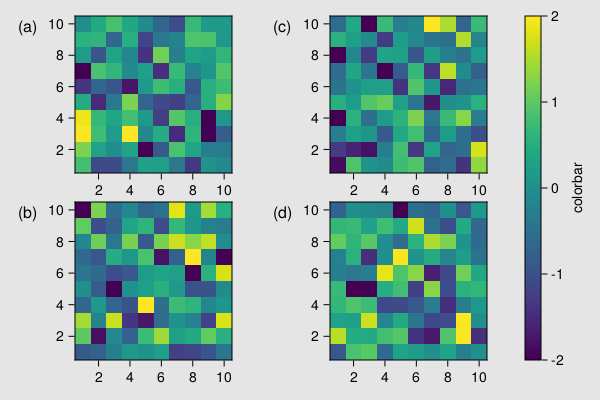

In [73]:
function squares_layout()
    seed!(123)
    letters = reshape(collect('a':'d'), (2, 2))
    fig = Figure(resolution=(600, 400), fontsize=14, font="CMU Serif",
        backgroundcolor=:grey90)
    axs = [Axis(fig[i, j], aspect=DataAspect()) for i = 1:2, j = 1:2]
    hms = [heatmap!(axs[i, j], randn(10, 10), colorrange=(-2, 2))
           for i = 1:2, j = 1:2]
    Colorbar(fig[1:2, 3], hms[1], label="colorbar")
    [Label(fig[i, j, TopLeft()], "($(letters[i, j]))", textsize=16,
        padding=(-2, 0, -20, 0)) for i = 1:2, j = 1:2]
    colgap!(fig.layout, 5)
    rowgap!(fig.layout, 5)
    fig
end
squares_layout()

In [74]:
save("5.6.Layouts4.png", current_figure(); pt_per_unit=2)

where all labels are in the **protrusions** and each Axis has an AspectData() ratio. The Colorbar is located in the third column and expands from row 1 up to row 2.

The next case uses the so called ```Mixed()``` **alignmode**, which is especially useful when dealing with large empty spaces between ```Axis``` due to long ticks. Also, the Dates module from Julia’s standard library will be needed for this example.

In [75]:
using Dates

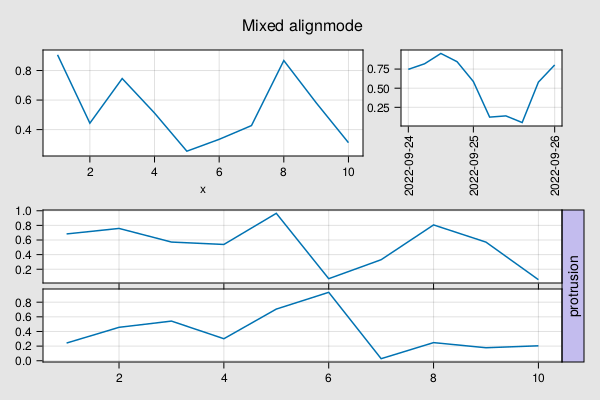

In [76]:
function mixed_mode_layout()
    seed!(123)
    longlabels = ["$(today() - Day(1))", "$(today())", "$(today() + Day(1))"]
    fig = Figure(resolution = (600, 400), fontsize = 12,
        backgroundcolor = :grey90, font = "CMU Serif")
    ax1 = Axis(fig[1, 1], xlabel = "x", alignmode = Mixed(bottom = 0))
    ax2 = Axis(fig[1, 2], xticklabelrotation = pi / 2, alignmode = Mixed(bottom = 0),
        xticks = ([1, 5, 10], longlabels))
    ax3 = Axis(fig[2, 1:2])
    ax4 = Axis(fig[3, 1:2])
    axs = [ax1, ax2, ax3, ax4]
    [lines!(ax, 1:10, rand(10)) for ax in axs]
    hidexdecorations!(ax3; ticks = false, grid = false)
    Box(fig[2:3, 1:2, Right()], color = (:slateblue1, 0.35))
    Label(fig[2:3, 1:2, Right()], "protrusion", rotation = pi / 2, textsize = 14,
        padding = (3, 3, 3, 3))
    Label(fig[1, 1:2, Top()], "Mixed alignmode", textsize = 16,
        padding = (0, 0, 15, 0))
    colsize!(fig.layout, 1, Auto(2))
    rowsize!(fig.layout, 2, Auto(0.5))
    rowsize!(fig.layout, 3, Auto(0.5))
    rowgap!(fig.layout, 1, 15)
    rowgap!(fig.layout, 2, 0)
    colgap!(fig.layout, 5)
    fig
end
mixed_mode_layout()

In [77]:
save("5.6.Layouts5.png", current_figure(); pt_per_unit=2)

Here, the argument ```alignmode=Mixed(bottom=0)``` is shifting the bounding box to the bottom, so that this will align with the panel on the left filling the space.

Also, see how ```colsize!``` and ```rowsize!``` are being used for different columns and rows. You could also put a number instead of ```Auto()``` but then everything will be fixed. And, additionally, one could also give a ```height``` or ```width``` when defining the ```Axis```, as in ```Axis(fig, height=50)``` which will be fixed as well.

### 5.6.1 Nested Axis (subplots)

It is also possible to define a set of ```Axis``` (subplots) explicitly, and use it to build a main figure with several rows and columns. For instance, the following is a “complicated” arrangement of ```Axis```:

In [78]:
function nested_sub_plot!(fig)
    color = rand(RGBf)
    ax1 = Axis(fig[1, 1], backgroundcolor=(color, 0.25))
    ax2 = Axis(fig[1, 2], backgroundcolor=(color, 0.25))
    ax3 = Axis(fig[2, 1:2], backgroundcolor=(color, 0.25))
    ax4 = Axis(fig[1:2, 3], backgroundcolor=(color, 0.25))
    return (ax1, ax2, ax3, ax4)
end

nested_sub_plot! (generic function with 1 method)

which, when used to build a more complex figure by doing several calls, we obtain:

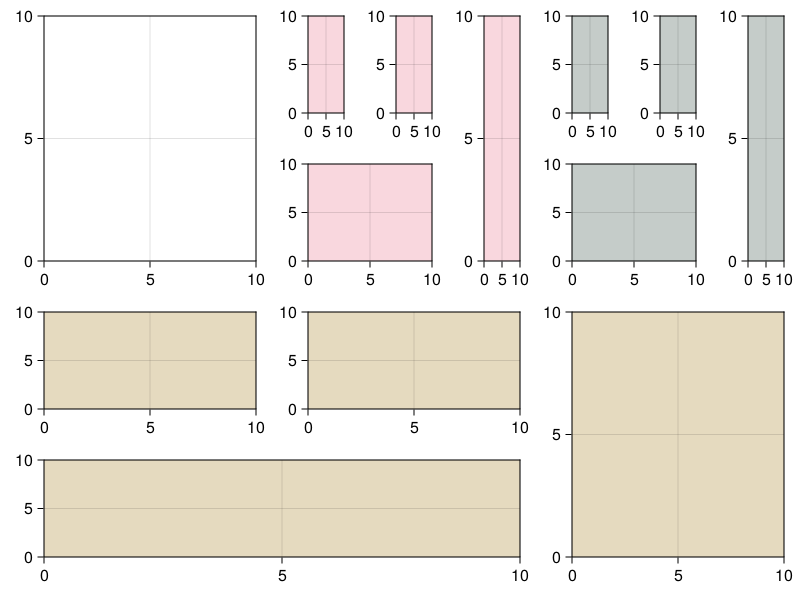

In [79]:
function main_figure()
    fig = Figure()
    Axis(fig[1, 1])
    nested_sub_plot!(fig[1, 2])
    nested_sub_plot!(fig[1, 3])
    nested_sub_plot!(fig[2, 1:3])
    fig
end
main_figure()

In [80]:
save("5.6.1 subplots.png", current_figure(); pt_per_unit=2)

Note that different subplot functions can be called here. Also, each Axis here is an independent part of ```Figure```. So that, if you need to do some ```rowgap!```’s or ```colsize!```’s operations, you will need to do it in each one of them independently or to all of them together.

For grouped ```Axis``` (subplots) we can use ```GridLayout()``` which, then, could be used to compose a more complicated ```Figure```.

### 5.6.2 Nested GridLayout

By using ```GridLayout()``` we can group subplots, allowing more freedom to build complex figures. Here, using our previous ```nested_sub_plot!``` we define three sub-groups and one normal ```Axis```:

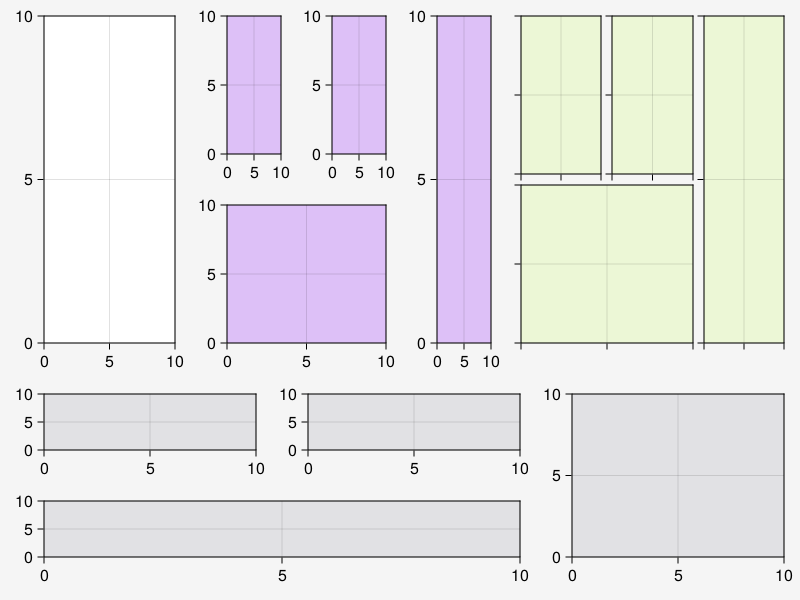

In [81]:
function nested_Grid_Layouts()
    fig = Figure(backgroundcolor=RGBf(0.96, 0.96, 0.96))
    ga = fig[1, 1] = GridLayout()
    gb = fig[1, 2] = GridLayout()
    gc = fig[1, 3] = GridLayout()
    gd = fig[2, 1:3] = GridLayout()
    gA = Axis(ga[1, 1])
    nested_sub_plot!(gb)
    axsc = nested_sub_plot!(gc)
    nested_sub_plot!(gd)
    hidedecorations!.(axsc, grid=false, ticks=false)
    colgap!(gc, 5)
    rowgap!(gc, 5)
    rowsize!(fig.layout, 2, Auto(0.5))
    colsize!(fig.layout, 1, Auto(0.5))
    fig
end
nested_Grid_Layouts()

In [82]:
save("5.6.2 gridlayout.png", current_figure(); pt_per_unit=2)

Now, using ```rowgap!``` or ```colsize!``` over each group is possible and ```rowsize!```, ```colsize!``` can also be applied to the set of ```GridLayout()```s.

### 5.6.3 Inset plots

Currently, doing ```inset``` plots is a little bit tricky. Here, we show two possible ways of doing it by initially defining auxiliary functions. The first one is by doing a ```BBox```, which lives in the whole ```Figure``` space:

In [83]:
function add_box_inset(fig; left=100, right=250, bottom=200, top=300,
    bgcolor=:grey90)
    inset_box = Axis(fig, bbox=BBox(left, right, bottom, top),
        xticklabelsize=12, yticklabelsize=12, backgroundcolor=bgcolor)
    # bring content upfront
    translate!(inset_box.scene, 0, 0, 10)
    return inset_box
end

add_box_inset (generic function with 1 method)

Then, the ```inset``` is easily done, as in:

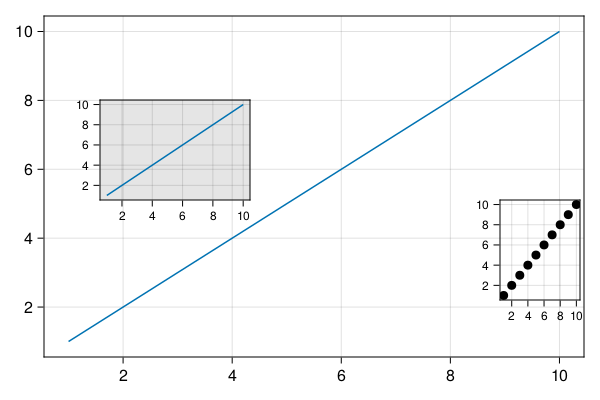

In [84]:
function figure_box_inset()
    fig = Figure(resolution=(600, 400))
    ax = Axis(fig[1, 1], backgroundcolor=:white)
    inset_ax1 = add_box_inset(fig; left=100, right=250, bottom=200, top=300,
        bgcolor=:grey90)
    inset_ax2 = add_box_inset(fig; left=500, right=580, bottom=100, top=200,
        bgcolor=(:white, 0.65))
    lines!(ax, 1:10)
    lines!(inset_ax1, 1:10)
    scatter!(inset_ax2, 1:10, color=:black)
    fig
end
figure_box_inset()

In [85]:
save("5.6.3 inset_plots_1.png", current_figure(); pt_per_unit=2)

where the ```Box``` dimensions are bound by the ```Figure```’s ```resolution```. Note, that an inset can be also outside the ```Axis```. The other approach, is by defining a new ```Axis``` into a position ```fig[i, j]``` specifying his ```width```, ```height```, ```halign``` and ```valign```. We do that in the following function:

In [86]:
function add_axis_inset(pos=fig[1, 1]; halign, valign, width=Relative(0.5),
        height=Relative(0.35), alignmode=Mixed(left = 5, right=5), bgcolor=:lightgray)

    inset_box = Axis(pos; width, height, halign, valign, alignmode,
        xticklabelsize=12, yticklabelsize=12, backgroundcolor=bgcolor)
    # bring content upfront
    translate!(inset_box.scene, 0, 0, 10)
    return inset_box
end

add_axis_inset (generic function with 2 methods)

See that in the following example the ```Axis``` with gray background will be rescaled if the total figure size changes. The insets are bound by the ```Axis``` positioning.

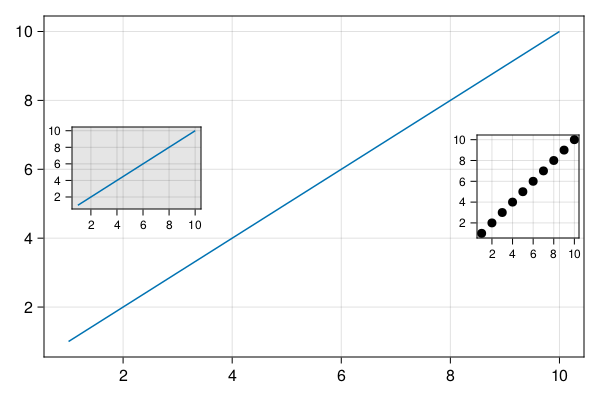

In [87]:
function figure_axis_inset()
    fig = Figure(resolution=(600, 400))
    ax = Axis(fig[1, 1], backgroundcolor=:white)
    inset_ax1 = add_axis_inset(fig[1, 1]; halign=:left, valign=:center,
        width=Relative(0.3), height=Relative(0.35),
        alignmode=Mixed(left=5, right=5, bottom=15),
        bgcolor = :grey90)
    inset_ax2 = add_axis_inset(fig[1, 1]; halign=:right, valign=:center,
        width=Relative(0.25), height=Relative(0.3), bgcolor=(:white, 0.65))
    lines!(ax, 1:10)
    lines!(inset_ax1, 1:10)
    scatter!(inset_ax2, 1:10, color=:black)
    fig
end
figure_axis_inset()

In [88]:
save("5.6.3 inset_plots_2.png", current_figure(); pt_per_unit=2)

And this should cover most used cases for layouting with Makie. Now, let’s do some nice 3D examples with ```GLMakie.jl```.

## 5.7 GLMakie.jl

In [89]:
using GLMakie
GLMakie.activate!()

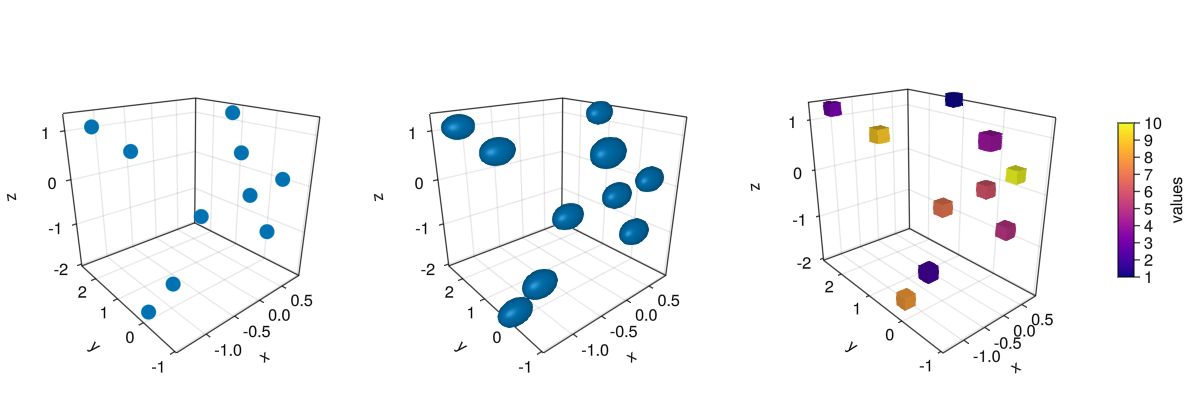

In [90]:
GLMakie.activate!()
function scatters_in_3D()
    seed!(123)
    n = 10
    x, y, z = randn(n), randn(n), randn(n)
    fig = Figure(; resolution=(1200, 400))
    ax1 = Axis3(fig[1, 1]; aspect=(1, 1, 1), perspectiveness=0.5)
    ax2 = Axis3(fig[1, 2]; aspect=(1, 1, 1), perspectiveness=0.5)
    ax3 = Axis3(fig[1, 3]; aspect=:data, perspectiveness=0.5)
    scatter!(ax1, x, y, z; markersize=15)
    meshscatter!(ax2, x, y, z; markersize=0.25)
    hm = meshscatter!(ax3, x, y, z; markersize=0.25,
        marker=Rect3f(Vec3f(0), Vec3f(1)), color=1:n,
        colormap=:plasma, transparency=false)
    Colorbar(fig[1, 4], hm, label="values", height=Relative(0.5))
    fig
end
scatters_in_3D()

In [91]:
save("5.7.1 GLMakie_1.png", current_figure(); pt_per_unit=2)

Note also, that a different geometry can be passed as markers, i.e., a square/rectangle, and we can assign a ```colormap``` for them as well. In the middle panel one could get perfect spheres by doing ```aspect = :data``` as in the right panel.

And doing ```lines``` or ```scatterlines``` is also straightforward:

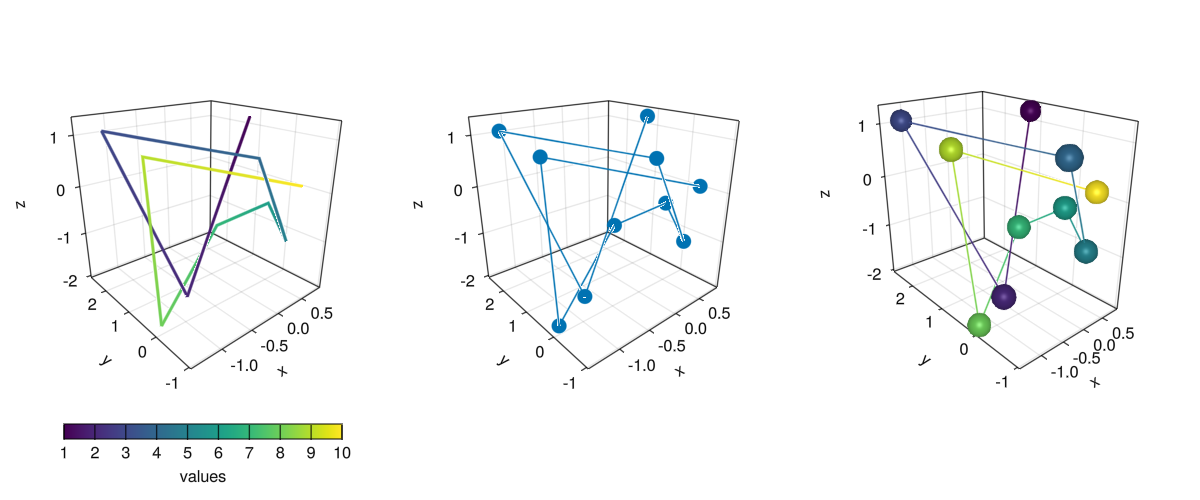

In [92]:
function lines_in_3D()
    seed!(123)
    n = 10
    x, y, z = randn(n), randn(n), randn(n)
    fig = Figure(; resolution=(1200, 500))
    ax1 = Axis3(fig[1, 1]; aspect=(1, 1, 1), perspectiveness=0.5)
    ax2 = Axis3(fig[1, 2]; aspect=(1, 1, 1), perspectiveness=0.5)
    ax3 = Axis3(fig[1, 3]; aspect=:data, perspectiveness=0.5)
    lines!(ax1, x, y, z; color=1:n, linewidth=3)
    scatterlines!(ax2, x, y, z; markersize=15)
    hm = meshscatter!(ax3, x, y, z; markersize=0.2, color=1:n)
    lines!(ax3, x, y, z; color=1:n)
    Colorbar(fig[2, 1], hm; label="values", height=15, vertical=false,
        flipaxis=false, ticksize=15, tickalign=1, width=Relative(3.55 / 4))
    fig
end
lines_in_3D()

In [93]:
save("5.7.1 GLMakie_2.png", current_figure(); pt_per_unit=2)

### 5.7.2 Surfaces, wireframe, contour, contourf and contour3d

To show these cases we’ll use the following ```peaks``` function:

In [94]:
function peaks(; n = 49)
    x = LinRange(-3, 3, n)
    y = LinRange(-3, 3, n)
    a = 3 * (1 .- x') .^ 2 .* exp.(-(x' .^ 2) .- (y .+ 1) .^ 2)
    b = 10 * (x' / 5 .- x' .^ 3 .- y .^ 5) .* exp.(-x' .^ 2 .- y .^ 2)
    c = 1 / 3 * exp.(-(x' .+ 1) .^ 2 .- y .^ 2)
    return (x, y, a .- b .- c)
end

peaks (generic function with 1 method)

In [95]:
typeof(LinRange(-3, 3, 49))

LinRange{Float64, Int64}

In [96]:
LinRange(-3, 3, 49)

49-element LinRange{Float64, Int64}:
 -3.0,-2.875,-2.75,-2.625,-2.5,-2.375,…,2.25,2.375,2.5,2.625,2.75,2.875,3.0

The output for the different plotting functions is

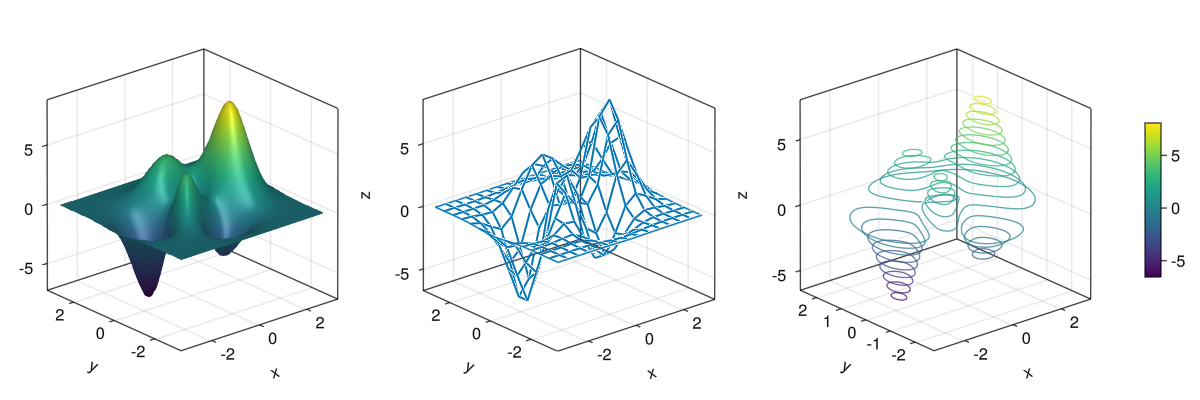

In [97]:
function plot_peaks_function()
    x, y, z = peaks()
    x2, y2, z2 = peaks(; n=15)
    fig = Figure(resolution=(1200, 400))
    axs = [Axis3(fig[1, i]; aspect=(1, 1, 채ㅜ1)) for i = 1:3]
    hm = surface!(axs[1], x, y, z)
    wireframe!(axs[2], x2, y2, z2)
    contour3d!(axs[3], x, y, z; levels=20)
    Colorbar(fig[1, 4], hm, height=Relative(0.5))
    fig
end
plot_peaks_function()

In [98]:
save("5.7.1 GLMakie_3.png", current_figure(); pt_per_unit=2)

But, it can also be plotted with a ```heatmap(x, y, z)```, ```contour(x, y, z)``` or ```contourf(x, y, z)```:

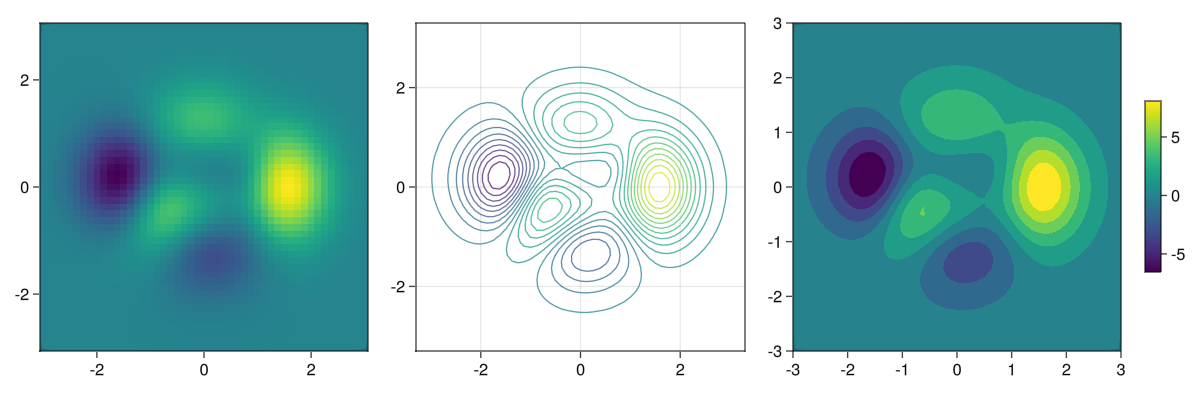

In [99]:
function heatmap_contour_and_contourf()
    x, y, z = peaks()
    fig = Figure(resolution=(1200, 400))
    axs = [Axis(fig[1, i]; aspect=DataAspect()) for i = 1:3]
    hm = heatmap!(axs[1], x, y, z)
    contour!(axs[2], x, y, z; levels=20)
    contourf!(axs[3], x, y, z)
    Colorbar(fig[1, 4], hm, height=Relative(0.5))
    fig
end

heatmap_contour_and_contourf()

In [100]:
save("5.7.1 GLMakie_4.png", current_figure(); pt_per_unit=2)

Additionally, by changing ```Axis``` to an ```Axis3```, these plots will be automatically be in the x-y plane:

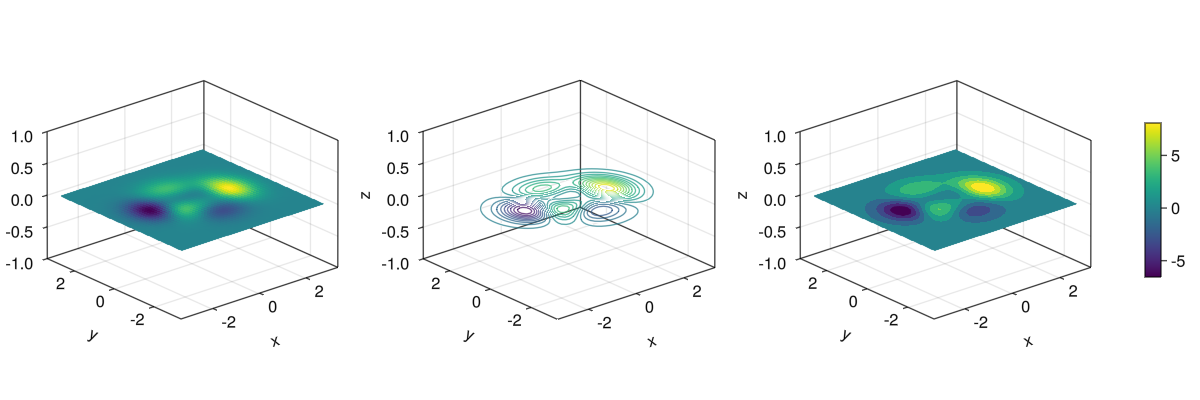

In [101]:
function heatmap_contour_and_contourf_in_a_3d_plane()
    x, y, z = peaks()
    fig = Figure(resolution=(1200, 400))
    axs = [Axis3(fig[1, i]) for i = 1:3]
    hm = heatmap!(axs[1], x, y, z)
    contour!(axs[2], x, y, z; levels=20)
    contourf!(axs[3], x, y, z)
    Colorbar(fig[1, 4], hm, height=Relative(0.5))
    fig
end
heatmap_contour_and_contourf_in_a_3d_plane()

In [102]:
save("5.7.1 GLMakie_5.png", current_figure(); pt_per_unit=2)

Something else that is easy to do is to mix all these plotting functions into just one plot, namely:

In [103]:
using TestImages

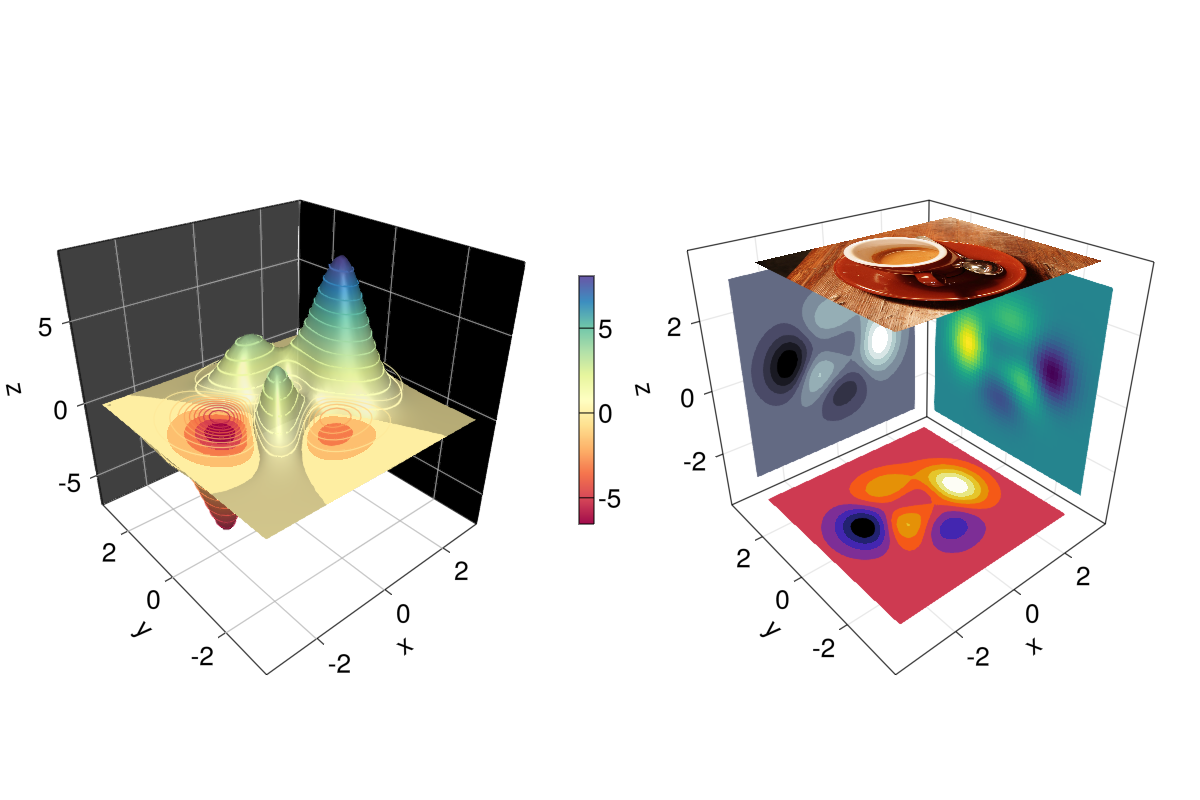

In [104]:
function mixing_surface_contour3d_contour_and_contourf()
    img = testimage("coffee.png")
    x, y, z = peaks()
    cmap = :Spectral_11
    fig = Figure(resolution=(1200, 800), fontsize=26)
    ax1 = Axis3(fig[1, 1]; aspect=(1, 1, 1), elevation=pi / 6, xzpanelcolor=(:black, 0.75),
        perspectiveness=0.5, yzpanelcolor=:black, zgridcolor=:grey70,
        ygridcolor=:grey70, xgridcolor=:grey70)
    ax2 = Axis3(fig[1, 3]; aspect=(1, 1, 1), elevation=pi / 6, perspectiveness=0.5)
    hm = surface!(ax1, x, y, z; colormap=(cmap, 0.95), shading=true)
    contour3d!(ax1, x, y, z .+ 0.02; colormap=cmap, levels=20, linewidth=2)
    xmin, ymin, zmin = minimum(ax1.finallimits[])
    xmax, ymax, zmax = maximum(ax1.finallimits[])
    contour!(ax1, x, y, z; colormap=cmap, levels=20, transformation=(:xy, zmax))
    contourf!(ax1, x, y, z; colormap=cmap, transformation=(:xy, zmin))
    Colorbar(fig[1, 2], hm, width=15, ticksize=15, tickalign=1, height=Relative(0.35))
    # transformations into planes
    heatmap!(ax2, x, y, z; colormap=:viridis, transformation=(:yz, 3.5))
    contourf!(ax2, x, y, z; colormap=:CMRmap, transformation=(:xy, -3.5))
    contourf!(ax2, x, y, z; colormap=:bone_1, transformation=(:xz, 3.5))
    image!(ax2, -3 .. 3, -3 .. 2, rotr90(img); transformation=(:xy, 3.8))
    xlims!(ax2, -3.8, 3.8)
    ylims!(ax2, -3.8, 3.8)
    zlims!(ax2, -3.8, 3.8)
    fig
end

mixing_surface_contour3d_contour_and_contourf()

In [105]:
save("5.7.1 GLMakie_6.png", current_figure(); pt_per_unit=2)

Not bad, right? From there is clear that any ```heatmap```’s, ```contour```’s, ```contourf```’s or ```image``` can be plotted into any plane.

### 5.7.3 Arrows and Streamplots

```arrows``` and ```streamplot``` are plots that might be useful when we want to know the directions that a given variable will follow. See a demonstration below:

In [106]:
using LinearAlgebra

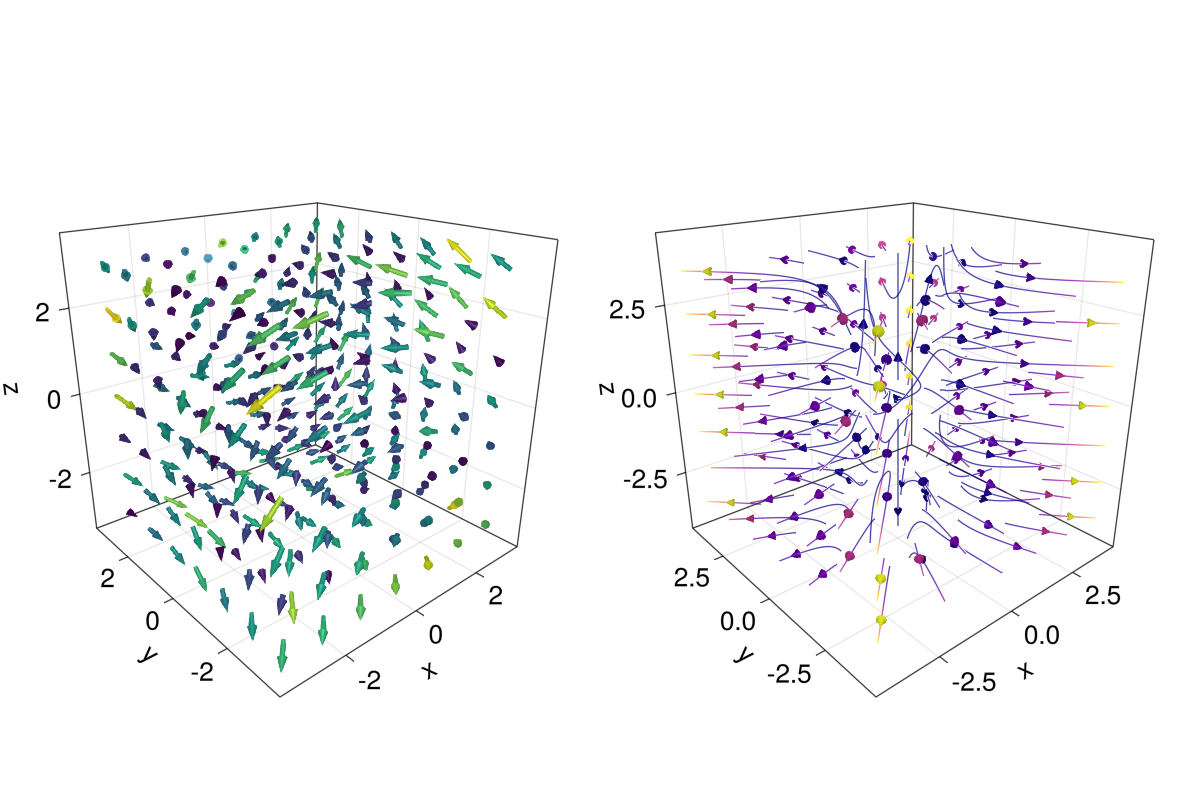

In [107]:
function arrows_and_streamplot_in_3d()
    ps = [Point3f(x, y, z) for x = -3:1:3 for y = -3:1:3 for z = -3:1:3]
    ns = map(p -> 0.1 * rand() * Vec3f(p[2], p[3], p[1]), ps)
    lengths = norm.(ns)
    flowField(x, y, z) = Point(-y + x * (-1 + x^2 + y^2)^2, x + y * (-1 + x^2 + y^2)^2,
        z + x * (y - z^2))
    fig = Figure(resolution=(1200, 800), fontsize=26)
    axs = [Axis3(fig[1, i]; aspect=(1, 1, 1), perspectiveness=0.5) for i = 1:2]
    arrows!(axs[1], ps, ns, color=lengths, arrowsize=Vec3f(0.2, 0.2, 0.3),
        linewidth=0.1)
    streamplot!(axs[2], flowField, -4 .. 4, -4 .. 4, -4 .. 4, colormap=:plasma,
        gridsize=(7, 7), arrow_size=0.25, linewidth=1)
    fig
end
arrows_and_streamplot_in_3d()

In [108]:
save("5.7.1 GLMakie_7.png", current_figure(); pt_per_unit=2)

Other interesting examples are a ```mesh(obj)```, a ```volume(x, y, z, vals)```, and a ```contour(x, y, z, vals)```.

### 5.7.4 Meshes and Volumes

Drawing meshes comes in handy when you want to plot geometries, like a Sphere or a Rectangle, i.e. ```FRect3D```. Another approach to visualize points in 3D space is by calling the functions ```volume``` and ```contour```, which implements ray tracing to simulate a wide variety of optical effects. See the next examples:

In [109]:
using GeometryBasics

In [110]:
function mesh_volume_contour()
    # mesh objects
    rectMesh = Rect3f(Vec3f(-0.5), Vec3f(1))
    recmesh = GeometryBasics.mesh(rectMesh)
    sphere = Sphere(Point3f(0), 1)
    # https://juliageometry.github.io/GeometryBasics.jl/stable/primitives/
    spheremesh = GeometryBasics.mesh(Tesselation(sphere, 64))
    # uses 64 for tesselation, a smoother sphere
    colors = [rand() for v in recmesh.position]
    # cloud points for volume
    x = y = z = 1:10
    vals = randn(10, 10, 10)
    fig = Figure(resolution=(1200, 400))
    axs = [Axis3(fig[1, i]; aspect=(1, 1, 1), perspectiveness=0.5) for i = 1:3]
    mesh!(axs[1], recmesh; color=colors, colormap=:rainbow, shading=false)
    mesh!(axs[1], spheremesh; color=(:white, 0.25), transparency=true)
    volume!(axs[2], x, y, z, vals; colormap=Reverse(:plasma))
    contour!(axs[3], x, y, z, vals; colormap=Reverse(:plasma))
    fig
end

mesh_volume_contour (generic function with 1 method)

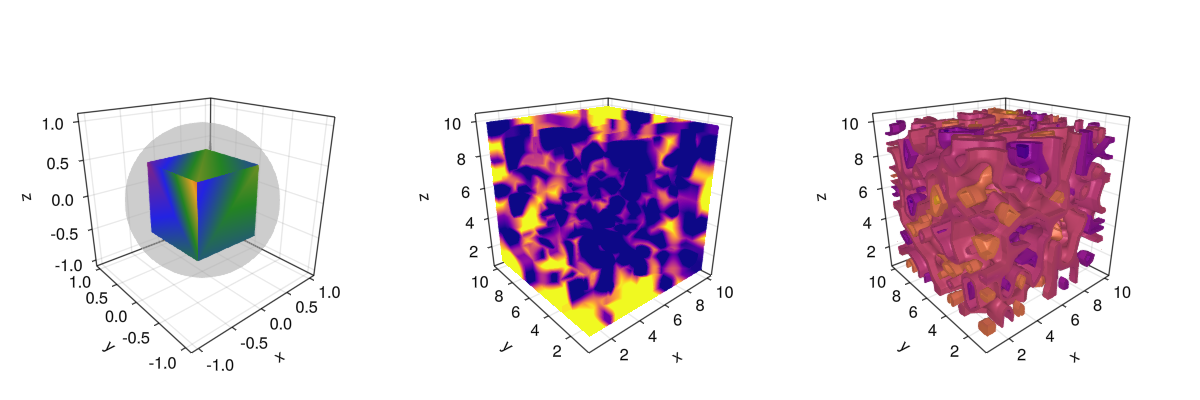

In [111]:
mesh_volume_contour()

In [112]:
save("5.7.1 GLMakie_8.png", current_figure(); pt_per_unit=2)

Note that here we are plotting two meshes in the same axis, one transparent sphere and a cube. So far, we have covered most of the 3D use-cases.

Taking as reference the previous example one can do the following custom plot with spheres and rectangles:

In [113]:
using GeometryBasics, Colors

For the spheres let’s do a rectangular grid. Also, we will use a different color for each one of them. Additionally, we can mix spheres and a rectangular plane. Next, we define all the necessary data.

In [114]:
seed!(123)
spheresGrid = [Point3f(i,j,k) for i in 1:2:12 for j in 1:2:10 for k in 1:2:10]
colorSphere = [RGBA(i * 0.1, j * 0.1, k * 0.1, 0.75) for i in 1:2:12 for j in 1:2:10 for k in 1:2:10]
spheresPlane = [Point3f(i,j,k) for i in 1:2.5:20 for j in 1:2.5:10 for k in 1:2.5:4]
cmap = get(colorschemes[:plasma], LinRange(0, 1, 50))
colorsPlane = cmap[rand(1:50,50)]
rectMesh = Rect3f(Vec3f(-1, -1, 2.1), Vec3f(22, 11, 0.5))
recmesh = GeometryBasics.mesh(rectMesh)
colors = [RGBA(rand(4)...) for v in recmesh.position]

In [115]:
save("5.7.1 GLMakie_9.png", current_figure(); pt_per_unit=2)

Then, the plot is simply done with:

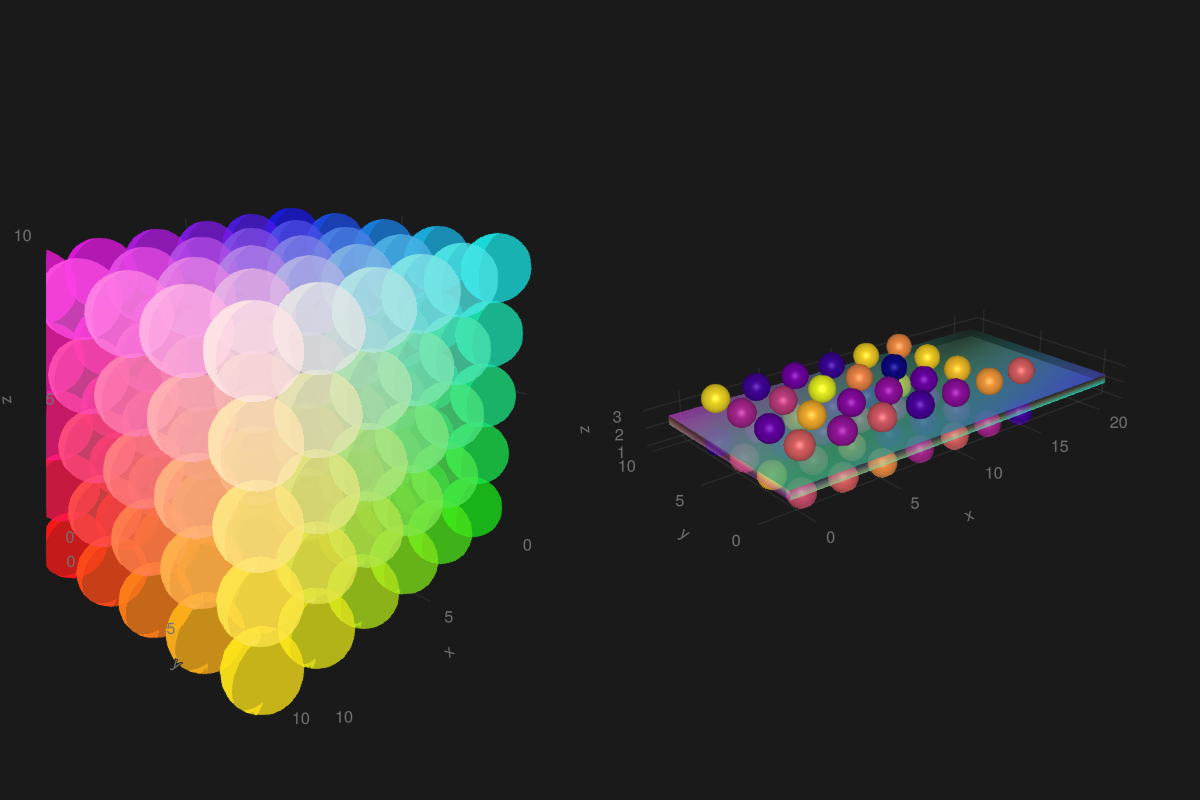

In [116]:
function grid_spheres_and_rectangle_as_plate()
    fig = with_theme(theme_dark()) do
        fig = Figure(resolution=(1200, 800))
        ax1 = Axis3(fig[1, 1]; aspect=:data, perspectiveness=0.5, azimuth=0.72)
        ax2 = Axis3(fig[1, 2]; aspect=:data, perspectiveness=0.5)
        meshscatter!(ax1, spheresGrid; color = colorSphere, markersize = 1,
            shading=false)
        meshscatter!(ax2, spheresPlane; color=colorsPlane, markersize = 0.75,
            lightposition=Vec3f(10, 5, 2), ambient=Vec3f(0.95, 0.95, 0.95),
            backlight=1.0f0)
        mesh!(recmesh; color=colors, colormap=:rainbow, shading=false)
        limits!(ax1, 0, 10, 0, 10, 0, 10)
        fig
    end
    fig
end

grid_spheres_and_rectangle_as_plate()

In [117]:
save("5.7.1 GLMakie_10.png", current_figure(); pt_per_unit=2)

Here, the rectangle is semi-transparent due to the alpha channel added to the RGB color. The rectangle function is quite versatile, for instance 3D boxes are easy to implement which in turn could be used for plotting a 3D histogram. See our next example, where we are using again our peaks function and some additional definitions:

In [118]:
x, y, z = peaks(; n=15)
δx = (x[2] - x[1]) / 2
δy = (y[2] - y[1]) / 2
cbarPal = :Spectral_11
ztmp = (z .- minimum(z)) ./ (maximum(z .- minimum(z)))
cmap = get(colorschemes[cbarPal], ztmp)
cmap2 = reshape(cmap, size(z))
ztmp2 = abs.(z) ./ maximum(abs.(z)) .+ 0.15

15×15 Matrix{Float64}:
 0.150009  0.150065  0.150298  0.150667  …  0.15028   0.150025  0.150001
 0.150034  0.150254  0.151111  0.151971     0.151362  0.150114  0.150002
 0.150083  0.15067   0.15311   0.15604      0.153317  0.150155  0.150021
 0.150069  0.150909  0.155824  0.16857      0.150651  0.150916  0.15021
 0.150355  0.15121   0.151111  0.176557     0.169284  0.155434  0.150865
 0.151663  0.159246  0.179242  0.183096  …  0.210506  0.164435  0.152146
 0.153567  0.171826  0.233431  0.328382     0.254843  0.174441  0.153596
 0.154661  0.179478  0.269199  0.437907     0.273639  0.178759  0.154229
 0.15401   0.175669  0.2558    0.415109     0.252156  0.17373   0.153488
 0.15231   0.164708  0.20985   0.294708     0.211442  0.163991  0.152036
 0.150836  0.154917  0.166612  0.169379  …  0.182047  0.156578  0.150903
 0.150137  0.150339  0.153109  0.184908     0.166589  0.152843  0.150344
 0.150022  0.150463  0.154576  0.177478     0.157159  0.151072  0.150114
 0.150017  0.150216  0.151776

here $\delta{x}, \delta{y}$ are used to specify our boxes size. cmap2 will be the color for each box and ```ztmp2``` will be used as a transparency parameter. See the output in the next figure.

In [119]:
function histogram_or_bars_in_3d()
    fig = Figure(resolution=(1200, 800), fontsize=26)
    ax1 = Axis3(fig[1, 1]; aspect=(1, 1, 1), elevation=π/6,
        perspectiveness=0.5)
    ax2 = Axis3(fig[1, 2]; aspect=(1, 1, 1), perspectiveness=0.5)
    rectMesh = Rect3f(Vec3f(-0.5, -0.5, 0), Vec3f(1, 1, 1))
    meshscatter!(ax1, x, y, 0*z, marker = rectMesh, color = z[:],
        markersize = Vec3f.(2δx, 2δy, z[:]), colormap = :Spectral_11,
        shading=false)
    limits!(ax1, -3.5, 3.5, -3.5, 3.5, -7.45, 7.45)
    meshscatter!(ax2, x, y, 0*z, marker = rectMesh, color = z[:],
        markersize = Vec3f.(2δx, 2δy, z[:]), colormap = (:Spectral_11, 0.25),
        shading=false, transparency=true)
    for (idx, i) in enumerate(x), (idy, j) in enumerate(y)
        rectMesh = Rect3f(Vec3f(i - δx, j - δy, 0), Vec3f(2δx, 2δy, z[idx, idy]))
        recmesh = GeometryBasics.mesh(rectMesh)
        lines!(ax2, recmesh; color=(cmap2[idx, idy], ztmp2[idx, idy]))
    end
    fig
end

histogram_or_bars_in_3d (generic function with 1 method)

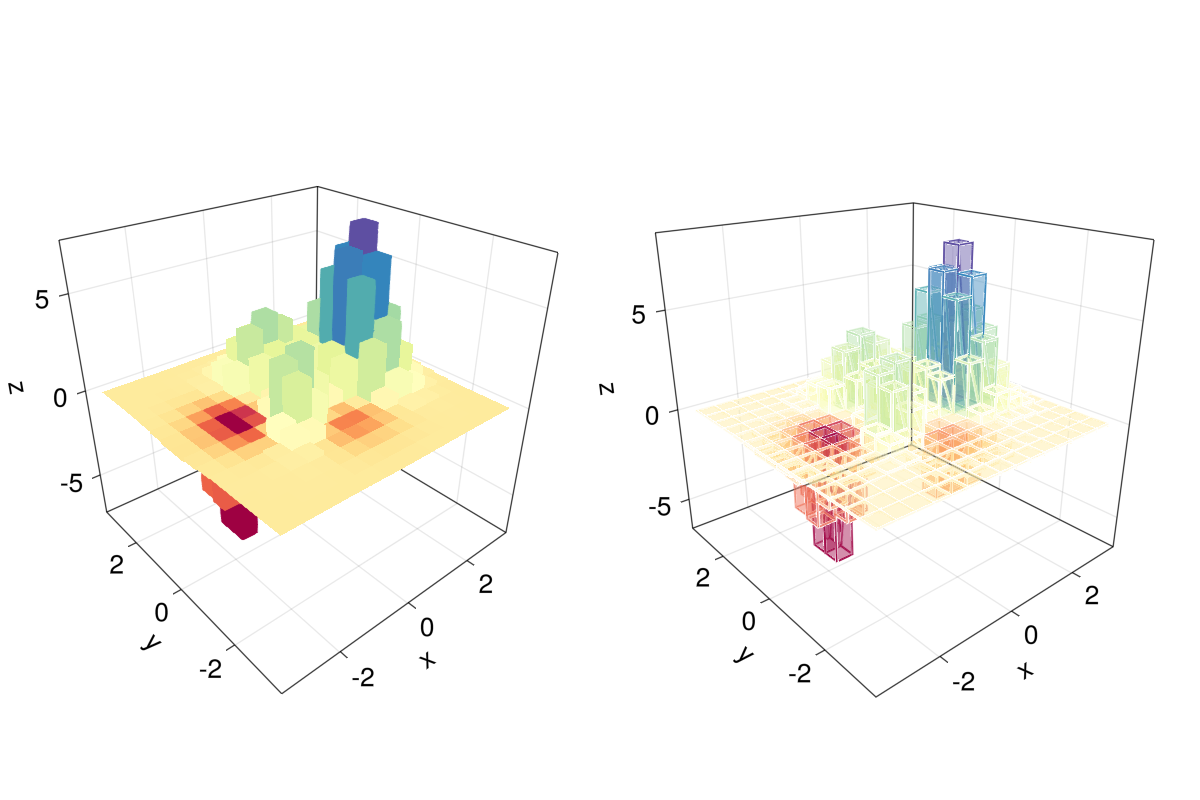

In [120]:
histogram_or_bars_in_3d()

In [121]:
save("5.7.1 GLMakie_11.png", current_figure(); pt_per_unit=2)

Note, that you can also call ```lines``` or ```wireframe``` over a mesh object.

### 5.7.5 Filled Line and Band

For our last example we will show how to do a filled curve in 3D with band and some ```linesegments```:

In [122]:
function filled_line_and_linesegments_in_3D()
    xs = LinRange(-3, 3, 10)
    lower = [Point3f(i, -i, 0) for i in LinRange(0, 3, 100)]
    upper = [Point3f(i, -i, sin(i) * exp(-(i + i))) for i in range(0, 3, length=100)]
    fig = Figure(resolution=(1200, 800))
    axs = [Axis3(fig[1, i]; elevation=pi/6, perspectiveness=0.5) for i = 1:2]
    band!(axs[1], lower, upper, color=repeat(norm.(upper), outer=2), colormap=:CMRmap)
    lines!(axs[1], upper, color=:black)
    linesegments!(axs[2], cos.(xs), xs, sin.(xs), linewidth=5, color=1:length(xs))
    fig
end


filled_line_and_linesegments_in_3D (generic function with 1 method)

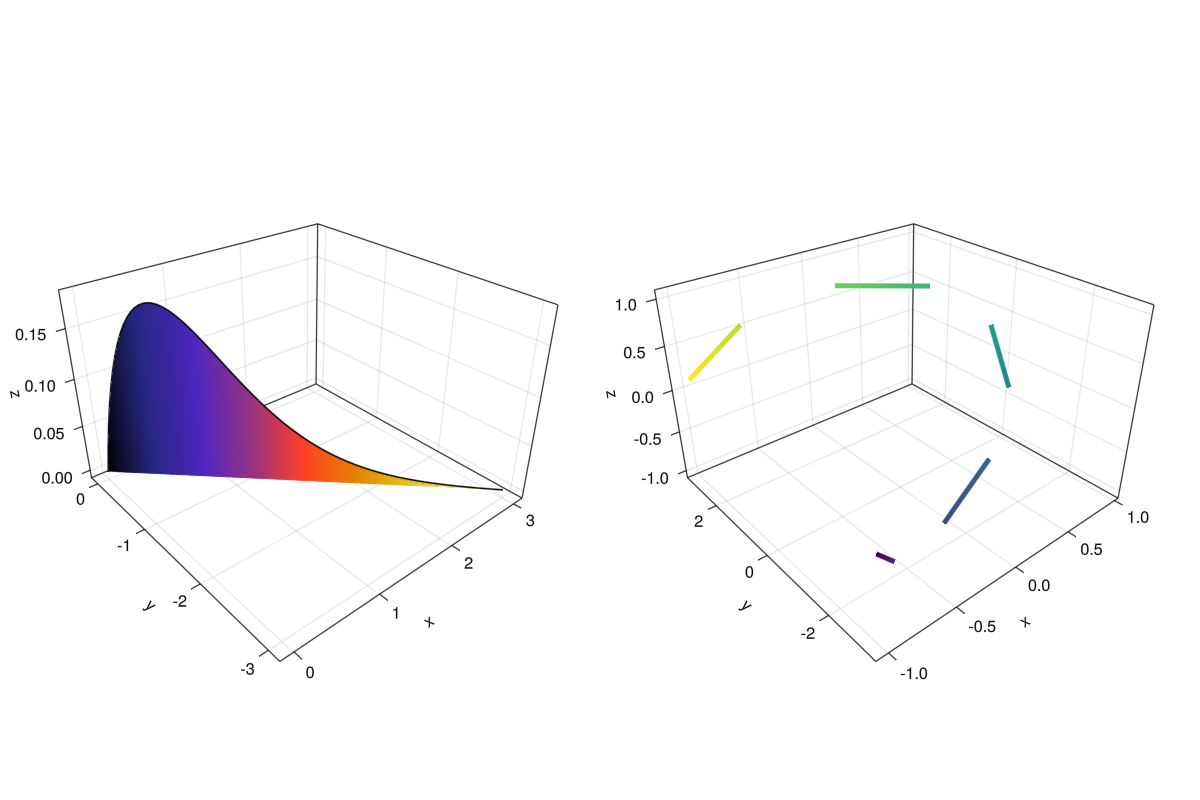

In [123]:
filled_line_and_linesegments_in_3D()

In [124]:
save("5.7.1 GLMakie_12.png", current_figure(); pt_per_unit=2)

Finally, our journey doing 3D plots has come to an end. You can combine everything we exposed here to create amazing 3D images!

## 5.8 A Makie recipe for a DataFrame

Unlike other libraries that already support a wide set of input formats via recipes, i.e. ```Plots.jl```, in ```Makie.jl``` most of the time we need to pass the raw data to functions. However, we can also define our own recipe in ```Makie.jl```. A recipe is your own custom plotting type command. This extension is done just in ```Makie.jl```, which means that making a new set of plotting rules for your own types is light, namely, you don’t need the complete plotting machinery available to define them. This is specially useful if you want to include your own plotting commands in one of your own packages. However, in order for them to work you will still need to use one of the backends, i.e., ```GLMakie``` or ```CairoMakie```.

As an example we will code a small full recipe for a DataFrame. Please refer to the documentation for more details.

> **(Plot Recipes)** https://docs.makie.org/stable/documentation/recipes/

A Makie recipe consist of two parts, a plot type name defined via @recipe and a custom plot!(::Makie.plot) which creates the actual plot via plotting functions already defined.

In [125]:
@recipe(DfPlot, df) do scene
    Attributes(
        x = :A,
        y = :B,
        c = :C,
        color = :red,
        colormap = :plasma,
        markersize = 20,
        marker = :rect,
        colorrange = (0,1),
        label = "",
    )
end

Note that the macro ```@recipe``` will automatically create two new functions for us, ```dfplot``` and ```dfplot!```, all lowercase from our type ```DfPlot```. The first one will create a complete new figure whereas the second one will plot into the current axis or an axis of your choosing. This allows us to plot ```DataFrames``` which contains columns named, ```x```, ```y```, ```z```. Now, let’s take care of our plot definition. We will do a simple scatter plot:

In [126]:
import Makie

In [127]:
using DataFrames

In [128]:
function Makie.plot!(p::DfPlot{<:Tuple{<:DataFrame}})
    df = p[:df][]
    x = getproperty(df, p[:x][])
    y = getproperty(df, p[:y][])
    c = getproperty(df, p[:c][])
    scatter!(p, x, y; color = c, markersize = p[:markersize][],
        colormap = p[:colormap][], marker = p[:marker][],
        colorrange = (minimum(x), maximum(c)), label = p[:label][])
    return p
end

Note the extras ```[]``` at the end of each variable. Those are due to the fact that recipes in Makie are dynamic, meaning that our plots will update if our variables change. See observables to know more. Now, we apply our new plotting function to the following ```DataFrame```:

> **(Observables & Interaction)** https://docs.makie.org/stable/documentation/nodes/

In [129]:
df_recipe = DataFrame(A=randn(10), B=randn(10), C=rand(10))

10×3 DataFrame
 Row │ A           B          C         
     │ Float64     Float64    Float64   
─────┼──────────────────────────────────
   1 │ -0.88283    -1.16329   0.514177
   2 │  0.0293954   0.983254  0.764613
   3 │ -1.74623    -1.70626   0.760205
   4 │ -0.534801    0.215434  0.553558
   5 │ -0.1008      0.260804  0.912065
   6 │ -0.46416    -1.34715   0.948512
   7 │ -0.180876   -0.799204  0.657441
   8 │ -1.21674     1.3165    0.298179
   9 │ -1.58417    -0.458261  0.0752388
  10 │  0.433144    0.232625  0.391155

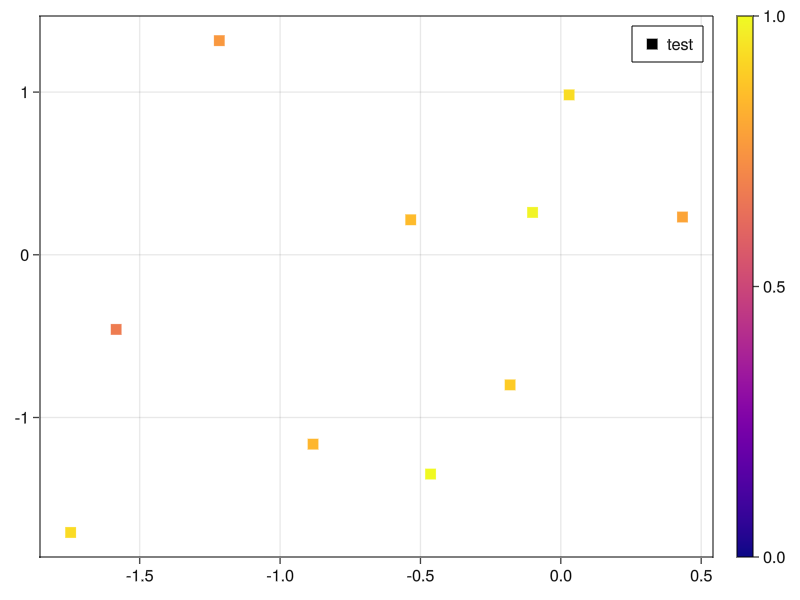

In [130]:
fig, ax, obj = dfplot(df_recipe; label = "test")
axislegend()
Colorbar(fig[1,2], obj)
fig

In [131]:
save("5.8.DataFrames1.png", current_figure(); pt_per_unit=2)

The named attributes in the recipe allows us to pass custom names to our new plotting function. Namely:

In [132]:
df_names = DataFrame(a1=rand(100), a2=rand(100), a3=rand(100))

100×3 DataFrame
 Row │ a1         a2         a3        
     │ Float64    Float64    Float64   
─────┼─────────────────────────────────
   1 │ 0.104867   0.511078   0.257822
   2 │ 0.176197   0.503823   0.706267
   3 │ 0.468066   0.503967   0.329515
   4 │ 0.247198   0.712711   0.152765
   5 │ 0.0558987  0.343493   0.143704
   6 │ 0.389839   0.514714   0.461137
   7 │ 0.127489   0.0458864  0.417602
   8 │ 0.534655   0.106985   0.663027
   9 │ 0.813229   0.724709   0.465631
  10 │ 0.44104    0.21149    0.965831
  11 │ 0.570254   0.112836   0.219583
  ⋮  │     ⋮          ⋮          ⋮
  91 │ 0.174992   0.317635   0.475522
  92 │ 0.992219   0.104601   0.134514
  93 │ 0.81465    0.533663   0.215371
  94 │ 0.0370225  0.533039   0.568026
  95 │ 0.706693   0.727591   0.909269
  96 │ 0.175468   0.588261   0.856028
  97 │ 0.441172   0.8107     0.628623
  98 │ 0.740735   0.988332   0.455829
  99 │ 0.0669452  0.557474   0.218812
 100 │ 0.547711   0.47971    0.0787349
                        79 rows omitted

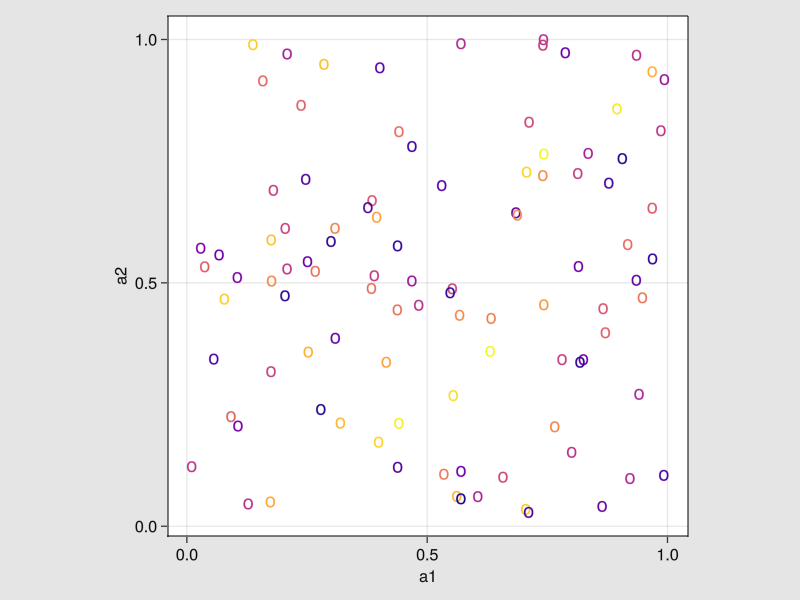

In [133]:
dfplot(df_names; x = :a1, y = :a2, c = :a3, marker = 'o',
    axis = (; aspect=1, xlabel = "a1", ylabel = "a2"),
    figure = (; backgroundcolor = :grey90))

In [134]:
save("5.8.DataFrames2.png", current_figure(); pt_per_unit=2)

Note, that now we are calling by name each column as well as the marker type, allowing us to use this definition for different DataFrames. Additionally, all our previous options, i.e., ```axis``` or ```figure``` also work!